### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [356]:
data = pd.read_csv('data/coupons.csv')

In [357]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [358]:
data.shape

(12684, 26)

In [359]:
data.isnull()

destination  passanger  weather  temperature   time  coupon  \
0            False      False    False        False  False   False   
1            False      False    False        False  False   False   
2            False      False    False        False  False   False   
3            False      False    False        False  False   False   
4            False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0           False   False  False          False  ...        False       True   
1           False   False  False          False  ...        False       True   
2           False   False  False          False  ...        False       True   
3           False   False  False          False  ...        False       True   
4           False   False  False          False  ...        False       True   
...           ...     ...    ...            ...  ...          ...        ...   
12679       False   False  False          False  ...        False      False   
12680       False   False  False          False  ...        False      False   
12681       False   False  False          False  ...        False      False   
12682       False   False  False          False  ...        False      False   
12683       False   False  False          False  ...        False      False   

       RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  \
0                     False             False             False   
1                     False             False             False   
2                     False             False             False   
3                     False             False             False   
4                     False             False             False   
...                     ...               ...               ...   
12679                 False             False             False   
12680                 False             False             False   
12681                 False             False             False   
12682                 False             False             False   
12683                 False             False             False   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  \
0                  False              False           False          False   
1                  False              False           False          False   
2                  False              False           False          False   
3                  False              False           False          False   
4                  False              False           False          False   
...                  ...                ...             ...            ...   
12679              False              False           False          False   
12680              False              False           False          False   
12681              False              False           False          False   
12682              False              False           False          False   
12683              False              False           False          False   

           Y  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
12679  False  
12680  False  
12681  False  
12682  False  
12683  False  

[12684 rows x 26 columns]

In [360]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [361]:
data.isnull().sum().sum()

13370

3. Decide what to do about your missing data -- drop, replace, other...

- In order to facilitate the follow-up analysis, it has been determined that certain columns, specifically which are currently defined as objects, must be treated as numerical. 

3-1 The "income" column will undergo some modifications to enable its classification as a numerical type. Specifically, all blank spaces, "$" signs, and "-" signs will be replaced with a single space. Additionally, income ranges will be substituted with their respective averages.

In [362]:
data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [363]:
data["income"]=data["income"].str.replace("$"," ",regex=True)
data["income"]=data["income"].str.replace("-"," ",regex=True)
data["income"]=data["income"].str.replace(" ","",regex=True)

In [364]:
data["income"]=data["income"].str.replace("2500037499","31250",regex=True)
data["income"]=data["income"].str.replace("1250024999","18750",regex=True)
data["income"]=data["income"].str.replace("3750049999","43750",regex=True)
data["income"]=data["income"].str.replace("100000orMore","100000",regex=True)
data["income"]=data["income"].str.replace("5000062499","56250",regex=True)
data["income"]=data["income"].str.replace("Lessthan12500","12499",regex=True)
data["income"]=data["income"].str.replace("8750099999","93750",regex=True)
data["income"]=data["income"].str.replace("7500087499","81250",regex=True)
data["income"]=data["income"].str.replace("6250074999","68750",regex=True)

In [365]:
data["income"]=pd.to_numeric(data["income"])

In [366]:
data['income'].value_counts()

31250     2013
18750     1831
43750     1805
100000    1736
56250     1659
12499     1042
93750      895
81250      857
68750      846
Name: income, dtype: int64



3-2 To define the "expiration" column as a numerical type, it has been decided that all values will be converted to hours.

In [367]:
data['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

In [368]:
data["expiration"]=data["expiration"].str.replace("1d","24")
data["expiration"]=data["expiration"].str.replace("2h","2")

In [369]:
data["expiration"]=pd.to_numeric(data["expiration"])

In [370]:
data['expiration'].value_counts()

24    7091
2     5593
Name: expiration, dtype: int64

3-3 The "Age" column is being modified by replacing "50plus" and "below21" with individual values, which results in its type being categorized as numerical.

In [371]:
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [372]:
data["age"]=data["age"].str.replace("50plus","51")
data["age"]=data["age"].str.replace("below21","20")

In [373]:
data["age"]=pd.to_numeric(data["age"])

In [374]:
data['age'].value_counts()

21    2653
26    2559
31    2039
51    1788
36    1319
41    1093
46     686
20     547
Name: age, dtype: int64

3-4 The "CoffeHouse" column will be modified to a numerical type by replacing all values with a single value, mostly representing their respective averages.

In [375]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [376]:
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("never","0")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("less1","1")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("1~3","2")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("4~8","6")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("gt8","9")

In [377]:
data["CoffeeHouse"]=pd.to_numeric(data["CoffeeHouse"])

In [378]:
data['CoffeeHouse'].value_counts()

1.0    3385
2.0    3225
0.0    2962
6.0    1784
9.0    1111
Name: CoffeeHouse, dtype: int64

3-5 To define the "Bar" column as a numerical type, it has been decided that all values will be replaced with a single value, mostly representing their respective averages.

In [379]:
data['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [380]:
data["Bar"]=data["Bar"].str.replace("never","0")
data["Bar"]=data["Bar"].str.replace("less1","1")
data["Bar"]=data["Bar"].str.replace("1~3","2")
data["Bar"]=data["Bar"].str.replace("4~8","6")
data["Bar"]=data["Bar"].str.replace("gt8","9")


In [381]:
data["Bar"]=pd.to_numeric(data["Bar"])

In [382]:
data['Bar'].value_counts()

0.0    5197
1.0    3482
2.0    2473
6.0    1076
9.0     349
Name: Bar, dtype: int64

3-6 To define the "CarryAway" column as a numerical type, it has been decided that all values will be replaced with a single value, mostly representing their respective averages.

In [383]:
data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [384]:
data["CarryAway"]=data["CarryAway"].str.replace("never","0")
data["CarryAway"]=data["CarryAway"].str.replace("less1","1")
data["CarryAway"]=data["CarryAway"].str.replace("1~3","2")
data["CarryAway"]=data["CarryAway"].str.replace("4~8","6")
data["CarryAway"]=data["CarryAway"].str.replace("gt8","9")

In [385]:
data["CarryAway"]=pd.to_numeric(data["CarryAway"])

In [386]:
data['CarryAway'].value_counts()

2.0    4672
6.0    4258
1.0    1856
9.0    1594
0.0     153
Name: CarryAway, dtype: int64

3-7 To define the "RestaurantLessThan20" column as a numerical type, it has been decided that all values will be replaced with a single value, mostly representing their respective averages.

In [387]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [388]:
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("never","0")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("less1","1")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("1~3","2")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("4~8","6")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("gt8","9")

In [389]:
data["RestaurantLessThan20"]=pd.to_numeric(data["RestaurantLessThan20"])

In [390]:
data['RestaurantLessThan20'].value_counts()

2.0    5376
6.0    3580
1.0    2093
9.0    1285
0.0     220
Name: RestaurantLessThan20, dtype: int64

3-8 The "Restaurant20To50" column will be modified to a numerical type by replacing all values with a single value, mostly representing their respective averages.

In [391]:
data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [392]:
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("never","0")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("less1","1")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("1~3","2")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("4~8","6")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("gt8","9")

In [393]:
data["Restaurant20To50"]=pd.to_numeric(data["Restaurant20To50"])

In [394]:
data['Restaurant20To50'].value_counts()

1.0    6077
2.0    3290
0.0    2136
6.0     728
9.0     264
Name: Restaurant20To50, dtype: int64

## Filling the NaN values

In [395]:
data.isnull().sum().sum()

13370

## Duplicates

In [396]:
# check the duplicates in all the columns 

data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [397]:
# Identify columns to check for duplicates
columns_to_check = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y']

# Remove duplicates and update the DataFrame
data.drop_duplicates(subset=columns_to_check, inplace=True)
data

destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon  expiration  gender  age      maritalStatus  ...  \
0            Restaurant(<20)          24  Female   21  Unmarried partner  ...   
1               Coffee House           2  Female   21  Unmarried partner  ...   
2      Carry out & Take away           2  Female   21  Unmarried partner  ...   
3               Coffee House           2  Female   21  Unmarried partner  ...   
4               Coffee House          24  Female   21  Unmarried partner  ...   
...                      ...         ...     ...  ...                ...  ...   
12679  Carry out & Take away          24    Male   26             Single  ...   
12680  Carry out & Take away          24    Male   26             Single  ...   
12681           Coffee House          24    Male   26             Single  ...   
12682                    Bar          24    Male   26             Single  ...   
12683      Restaurant(20-50)           2    Male   26             Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20  Restaurant20To50  \
0              0.0       NaN                  6.0               2.0   
1              0.0       NaN                  6.0               2.0   
2              0.0       NaN                  6.0               2.0   
3              0.0       NaN                  6.0               2.0   
4              0.0       NaN                  6.0               2.0   
...            ...       ...                  ...               ...   
12679          0.0       2.0                  6.0               2.0   
12680          0.0       2.0                  6.0               2.0   
12681          0.0       2.0                  6.0               2.0   
12682          0.0       2.0                  6.0               2.0   
12683          0.0       2.0                  6.0               2.0   

      toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                    1                  0                  0               0   
1                    1                  0                  0               0   
2                    1                  1                  0               0   
3                    1                  1                  0               0   
4                    1                  1                  0               0   
...                ...                ...                ...             ...   
12679                1                  0                  0               1   
12680                1                  0                  0               0   
12681                1                  0                  0               1   
12682                1                  1                  1               0   
12683                1                  0                  0               1   

       direction_opp  Y  
0                  1  1  
1                  1  0  
2                  1  1  
3                  1  0  
4                  1  0  
...              ... ..  
12679              0  1  
12680              1  1  
12681              0  0  
12682              1  0  
12683              0  0  

[12610 rows x 26 columns]

In [398]:
# Check for duplicates
print(data.duplicated().sum())

0


## Dropping the NaN

In [399]:
#this will dropp all rows that contains an NaN in it 
data.dropna(how='all') #(how='all')
data

destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon  expiration  gender  age      maritalStatus  ...  \
0            Restaurant(<20)          24  Female   21  Unmarried partner  ...   
1               Coffee House           2  Female   21  Unmarried partner  ...   
2      Carry out & Take away           2  Female   21  Unmarried partner  ...   
3               Coffee House           2  Female   21  Unmarried partner  ...   
4               Coffee House          24  Female   21  Unmarried partner  ...   
...                      ...         ...     ...  ...                ...  ...   
12679  Carry out & Take away          24    Male   26             Single  ...   
12680  Carry out & Take away          24    Male   26             Single  ...   
12681           Coffee House          24    Male   26             Single  ...   
12682                    Bar          24    Male   26             Single  ...   
12683      Restaurant(20-50)           2    Male   26             Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20  Restaurant20To50  \
0              0.0       NaN                  6.0               2.0   
1              0.0       NaN                  6.0               2.0   
2              0.0       NaN                  6.0               2.0   
3              0.0       NaN                  6.0               2.0   
4              0.0       NaN                  6.0               2.0   
...            ...       ...                  ...               ...   
12679          0.0       2.0                  6.0               2.0   
12680          0.0       2.0                  6.0               2.0   
12681          0.0       2.0                  6.0               2.0   
12682          0.0       2.0                  6.0               2.0   
12683          0.0       2.0                  6.0               2.0   

      toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                    1                  0                  0               0   
1                    1                  0                  0               0   
2                    1                  1                  0               0   
3                    1                  1                  0               0   
4                    1                  1                  0               0   
...                ...                ...                ...             ...   
12679                1                  0                  0               1   
12680                1                  0                  0               0   
12681                1                  0                  0               1   
12682                1                  1                  1               0   
12683                1                  0                  0               1   

       direction_opp  Y  
0                  1  1  
1                  1  0  
2                  1  1  
3                  1  0  
4                  1  0  
...              ... ..  
12679              0  1  
12680              1  1  
12681              0  0  
12682              1  0  
12683              0  0  

[12610 rows x 26 columns]

## Deleting the column 'car'

In [400]:
# I want to delete the column 'car' because I think we supposed all our customers are driving a car and to be able to eliminate all the rows that has a NaN in it

data = data.drop('car', axis=1)
data


destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon  expiration  gender  age      maritalStatus  ...  \
0            Restaurant(<20)          24  Female   21  Unmarried partner  ...   
1               Coffee House           2  Female   21  Unmarried partner  ...   
2      Carry out & Take away           2  Female   21  Unmarried partner  ...   
3               Coffee House           2  Female   21  Unmarried partner  ...   
4               Coffee House          24  Female   21  Unmarried partner  ...   
...                      ...         ...     ...  ...                ...  ...   
12679  Carry out & Take away          24    Male   26             Single  ...   
12680  Carry out & Take away          24    Male   26             Single  ...   
12681           Coffee House          24    Male   26             Single  ...   
12682                    Bar          24    Male   26             Single  ...   
12683      Restaurant(20-50)           2    Male   26             Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20  Restaurant20To50  \
0              0.0       NaN                  6.0               2.0   
1              0.0       NaN                  6.0               2.0   
2              0.0       NaN                  6.0               2.0   
3              0.0       NaN                  6.0               2.0   
4              0.0       NaN                  6.0               2.0   
...            ...       ...                  ...               ...   
12679          0.0       2.0                  6.0               2.0   
12680          0.0       2.0                  6.0               2.0   
12681          0.0       2.0                  6.0               2.0   
12682          0.0       2.0                  6.0               2.0   
12683          0.0       2.0                  6.0               2.0   

       toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                     1                  0                  0               0   
1                     1                  0                  0               0   
2                     1                  1                  0               0   
3                     1                  1                  0               0   
4                     1                  1                  0               0   
...                 ...                ...                ...             ...   
12679                 1                  0                  0               1   
12680                 1                  0                  0               0   
12681                 1                  0                  0               1   
12682                 1                  1                  1               0   
12683                 1                  0                  0               1   

       direction_opp  Y  
0                  1  1  
1                  1  0  
2                  1  1  
3                  1  0  
4                  1  0  
...              ... ..  
12679              0  1  
12680              1  1  
12681              0  0  
12682              1  0  
12683              0  0  

[12610 rows x 25 columns]

In [401]:
data.columns
# we see that we don't have the colomn 'car' now

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [402]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [403]:
data.isnull().sum().sum()

792

In [404]:
#now we dropp all the rows that have any NaN in it 

data= data.dropna(how='any')
data

destination  passanger weather  temperature  time  \
22     No Urgent Place      Alone   Sunny           55   2PM   
23     No Urgent Place  Friend(s)   Sunny           80  10AM   
24     No Urgent Place  Friend(s)   Sunny           80  10AM   
25     No Urgent Place  Friend(s)   Sunny           80  10AM   
26     No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon  expiration gender  age maritalStatus  ...  \
22           Restaurant(<20)          24   Male   21        Single  ...   
23              Coffee House           2   Male   21        Single  ...   
24                       Bar          24   Male   21        Single  ...   
25     Carry out & Take away           2   Male   21        Single  ...   
26              Coffee House          24   Male   21        Single  ...   
...                      ...         ...    ...  ...           ...  ...   
12679  Carry out & Take away          24   Male   26        Single  ...   
12680  Carry out & Take away          24   Male   26        Single  ...   
12681           Coffee House          24   Male   26        Single  ...   
12682                    Bar          24   Male   26        Single  ...   
12683      Restaurant(20-50)           2   Male   26        Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20  Restaurant20To50  \
22             1.0       6.0                  6.0               1.0   
23             1.0       6.0                  6.0               1.0   
24             1.0       6.0                  6.0               1.0   
25             1.0       6.0                  6.0               1.0   
26             1.0       6.0                  6.0               1.0   
...            ...       ...                  ...               ...   
12679          0.0       2.0                  6.0               2.0   
12680          0.0       2.0                  6.0               2.0   
12681          0.0       2.0                  6.0               2.0   
12682          0.0       2.0                  6.0               2.0   
12683          0.0       2.0                  6.0               2.0   

       toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
22                    1                  0                  0               0   
23                    1                  0                  0               0   
24                    1                  0                  0               0   
25                    1                  1                  0               0   
26                    1                  0                  0               0   
...                 ...                ...                ...             ...   
12679                 1                  0                  0               1   
12680                 1                  0                  0               0   
12681                 1                  0                  0               1   
12682                 1                  1                  1               0   
12683                 1                  0                  0               1   

       direction_opp  Y  
22                 1  1  
23                 1  0  
24                 1  1  
25                 1  0  
26                 1  0  
...              ... ..  
12679              0  1  
12680              1  1  
12681              0  0  
12682              1  0  
12683              0  0  

[12007 rows x 25 columns]

In [405]:

#we have no NaN in our Dataset
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [406]:
data.isnull()

destination  passanger  weather  temperature   time  coupon  \
22           False      False    False        False  False   False   
23           False      False    False        False  False   False   
24           False      False    False        False  False   False   
25           False      False    False        False  False   False   
26           False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
22          False   False  False          False  ...        False      False   
23          False   False  False          False  ...        False      False   
24          False   False  False          False  ...        False      False   
25          False   False  False          False  ...        False      False   
26          False   False  False          False  ...        False      False   
...           ...     ...    ...            ...  ...          ...        ...   
12679       False   False  False          False  ...        False      False   
12680       False   False  False          False  ...        False      False   
12681       False   False  False          False  ...        False      False   
12682       False   False  False          False  ...        False      False   
12683       False   False  False          False  ...        False      False   

       RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  \
22                    False             False             False   
23                    False             False             False   
24                    False             False             False   
25                    False             False             False   
26                    False             False             False   
...                     ...               ...               ...   
12679                 False             False             False   
12680                 False             False             False   
12681                 False             False             False   
12682                 False             False             False   
12683                 False             False             False   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  \
22                 False              False           False          False   
23                 False              False           False          False   
24                 False              False           False          False   
25                 False              False           False          False   
26                 False              False           False          False   
...                  ...                ...             ...            ...   
12679              False              False           False          False   
12680              False              False           False          False   
12681              False              False           False          False   
12682              False              False           False          False   
12683              False              False           False          False   

           Y  
22     False  
23     False  
24     False  
25     False  
26     False  
...      ...  
12679  False  
12680  False  
12681  False  
12682  False  
12683  False  

[12007 rows x 25 columns]

In [407]:
data.shape

(12007, 25)

In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12007 non-null  object 
 1   passanger             12007 non-null  object 
 2   weather               12007 non-null  object 
 3   temperature           12007 non-null  int64  
 4   time                  12007 non-null  object 
 5   coupon                12007 non-null  object 
 6   expiration            12007 non-null  int64  
 7   gender                12007 non-null  object 
 8   age                   12007 non-null  int64  
 9   maritalStatus         12007 non-null  object 
 10  has_children          12007 non-null  int64  
 11  education             12007 non-null  object 
 12  occupation            12007 non-null  object 
 13  income                12007 non-null  int64  
 14  Bar                   12007 non-null  float64
 15  CoffeeHouse       

In [409]:
data.describe()

temperature    expiration           age  has_children         income  \
count  12007.000000  12007.000000  12007.000000  12007.000000   12007.000000   
mean      63.301408     14.279837     32.529358      0.408845   52644.207046   
std       19.131641     10.925748     10.478051      0.491641   29740.026651   
min       30.000000      2.000000     20.000000      0.000000   12499.000000   
25%       55.000000      2.000000     21.000000      0.000000   31250.000000   
50%       80.000000     24.000000     31.000000      0.000000   43750.000000   
75%       80.000000     24.000000     41.000000      1.000000   81250.000000   
max       80.000000     24.000000     51.000000      1.000000  100000.000000   

                Bar   CoffeeHouse     CarryAway  RestaurantLessThan20  \
count  12007.000000  12007.000000  12007.000000          12007.000000   
mean       1.441576      2.451487      4.089281              3.693762   
std        2.081721      2.781622      2.752769              2.673887   
min        0.000000      0.000000      0.000000              0.000000   
25%        0.000000      1.000000      2.000000              2.000000   
50%        1.000000      1.000000      2.000000              2.000000   
75%        2.000000      2.000000      6.000000              6.000000   
max        9.000000      9.000000      9.000000              9.000000   

       Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count      12007.000000           12007.0       12007.000000   
mean           1.554177               1.0           0.559507   
std            1.720580               0.0           0.496467   
min            0.000000               1.0           0.000000   
25%            1.000000               1.0           0.000000   
50%            1.000000               1.0           1.000000   
75%            2.000000               1.0           1.000000   
max            9.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12007.000000    12007.000000   12007.000000  12007.000000  
mean            0.116266        0.215957       0.784043      0.568418  
std             0.320556        0.411502       0.411502      0.495317  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

4. What proportion of the total observations chose to accept the coupon? 



## Accepted coupons

In [410]:
accepted_coupons = data[data['Y'] == 1].shape[0]
total_observations = data.shape[0]

proportion_accepted = accepted_coupons / total_observations

print(f"Proportion of total observations that chose to accept the coupon: {proportion_accepted:.2f}")

Proportion of total observations that chose to accept the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

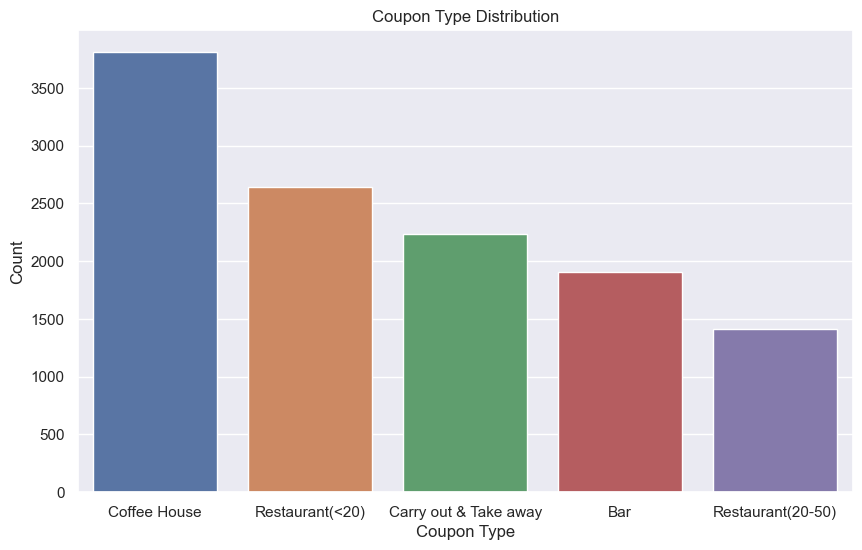

In [411]:
coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Coupon Type Distribution')
plt.show()

6. Use a histogram to visualize the temperature column.

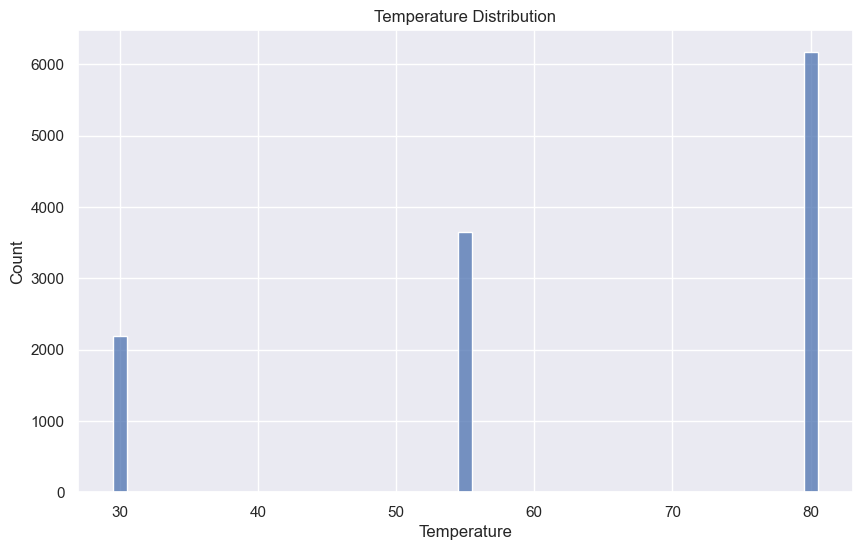

In [412]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', bins=[30, 55, 80], kde=False, discrete=True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [413]:
bar_coupons = data[data['coupon'] == 'Bar']

# Display the new DataFrame with just bar coupons
bar_coupons.head()

destination  passanger weather  temperature  time coupon  expiration  \
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar          24   
35             Home      Alone   Sunny           55   6PM    Bar          24   
39             Work      Alone   Sunny           55   7AM    Bar          24   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar          24   
57             Home      Alone   Sunny           55   6PM    Bar          24   

   gender  age maritalStatus  ...  CoffeeHouse CarryAway RestaurantLessThan20  \
24   Male   21        Single  ...          1.0       6.0                  6.0   
35   Male   21        Single  ...          1.0       6.0                  6.0   
39   Male   21        Single  ...          1.0       6.0                  6.0   
46   Male   46        Single  ...          6.0       2.0                  2.0   
57   Male   46        Single  ...          6.0       2.0                  2.0   

    Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  \
24               1.0                 1                  0                  0   
35               1.0                 1                  0                  0   
39               1.0                 1                  1                  1   
46               0.0                 1                  0                  0   
57               0.0                 1                  0                  0   

    direction_same  direction_opp  Y  
24               0              1  1  
35               1              0  1  
39               0              1  1  
46               0              1  0  
57               1              0  0  

[5 rows x 25 columns]

In [414]:
bar_coupons.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

2. What proportion of bar coupons were accepted?


In [415]:
accepted_bar_coupons = bar_coupons['Y'].sum()
total_bar_coupons = len(bar_coupons)
proportion_accepted_bar_coupons = accepted_bar_coupons / total_bar_coupons
percentage_accepted_bar_coupons = proportion_accepted_bar_coupons * 100

print(f"Proportion of bar coupons that were accepted: {proportion_accepted_bar_coupons:.4f}")
print(f"Percentage of bar coupons that were accepted: {percentage_accepted_bar_coupons:.2f}%")



Proportion of bar coupons that were accepted: 0.4119
Percentage of bar coupons that were accepted: 41.19%


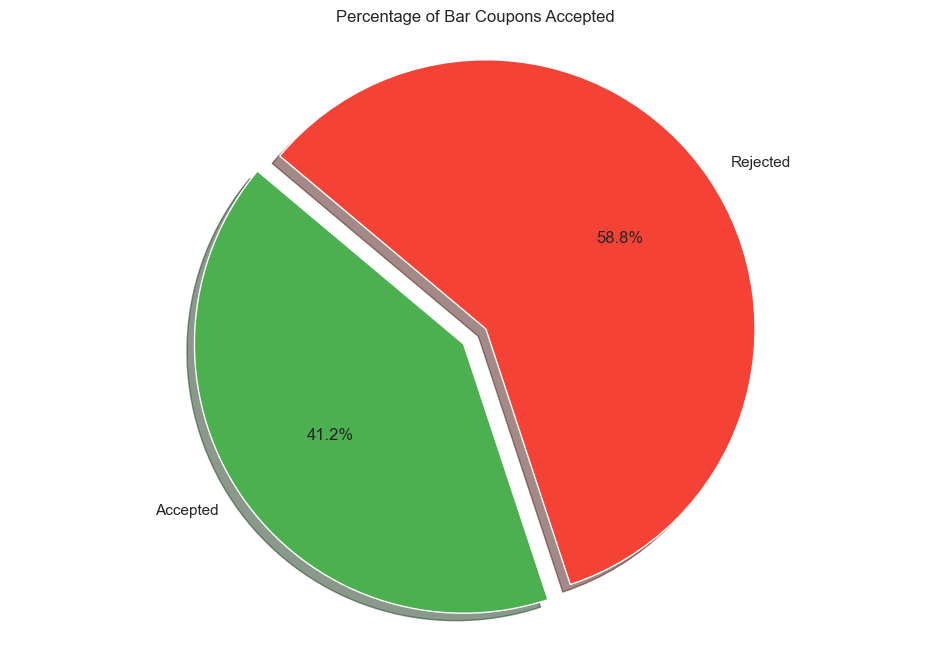

In [416]:


# Prepare data for the pie chart
labels = ['Accepted', 'Rejected']
sizes = [percentage_accepted_bar_coupons, 100 - percentage_accepted_bar_coupons]
colors = ['#4CAF50', '#F44336']
explode = (0.1, 0)

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title("Percentage of Bar Coupons Accepted")

# Display the chart
plt.show()


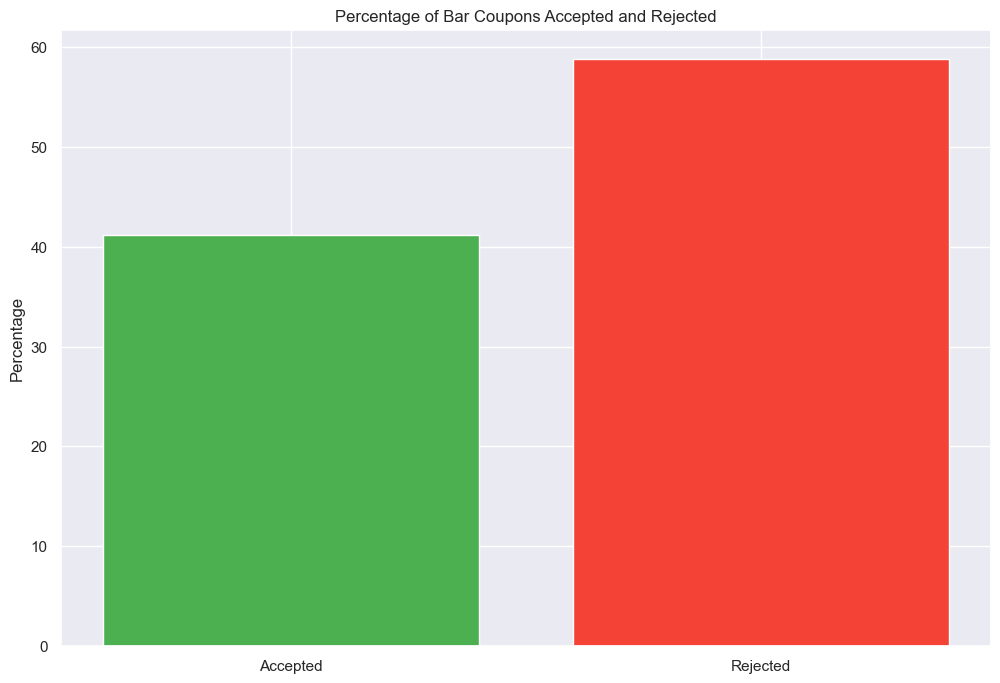

In [417]:
# Prepare data for the histogram
labels = ['Accepted', 'Rejected']
heights = [percentage_accepted_bar_coupons, 100 - percentage_accepted_bar_coupons]
colors = ['#4CAF50', '#F44336']

# Create the histogram
plt.bar(labels, heights, color=colors)

# Add labels and title
plt.ylabel('Percentage')
plt.title('Percentage of Bar Coupons Accepted and Rejected')

# Display the chart
plt.show()

In [418]:
#how many bar coupons were accepted
accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1].shape[0]
accepted_bar_coupons

785

In [419]:
#how many bar coupons were not accepted
naccepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 0].shape[0]
naccepted_bar_coupons

1121

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


- To compare the acceptance rate between those who went to a bar 3 or fewer times a month and those who went more, you can create two separate DataFrames and calculate the acceptance rate for each group. Here's how to do that:

In [420]:
# Filter bar_coupons DataFrame based on the 'Bar' column
fewer_than_3_visits = bar_coupons[bar_coupons['Bar'] <= 2]
more_than_3_visits = bar_coupons[bar_coupons['Bar'] > 2]

# Calculate the acceptance rate for each group
accepted_fewer_than_3_visits = fewer_than_3_visits['Y'].sum() / len(fewer_than_3_visits) * 100
accepted_more_than_3_visits = more_than_3_visits['Y'].sum() / len(more_than_3_visits) * 100

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {accepted_fewer_than_3_visits:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {accepted_more_than_3_visits:.2f}%")


Acceptance rate for those who went to a bar 3 or fewer times a month: 37.24%
Acceptance rate for those who went to a bar more than 3 times a month: 76.17%


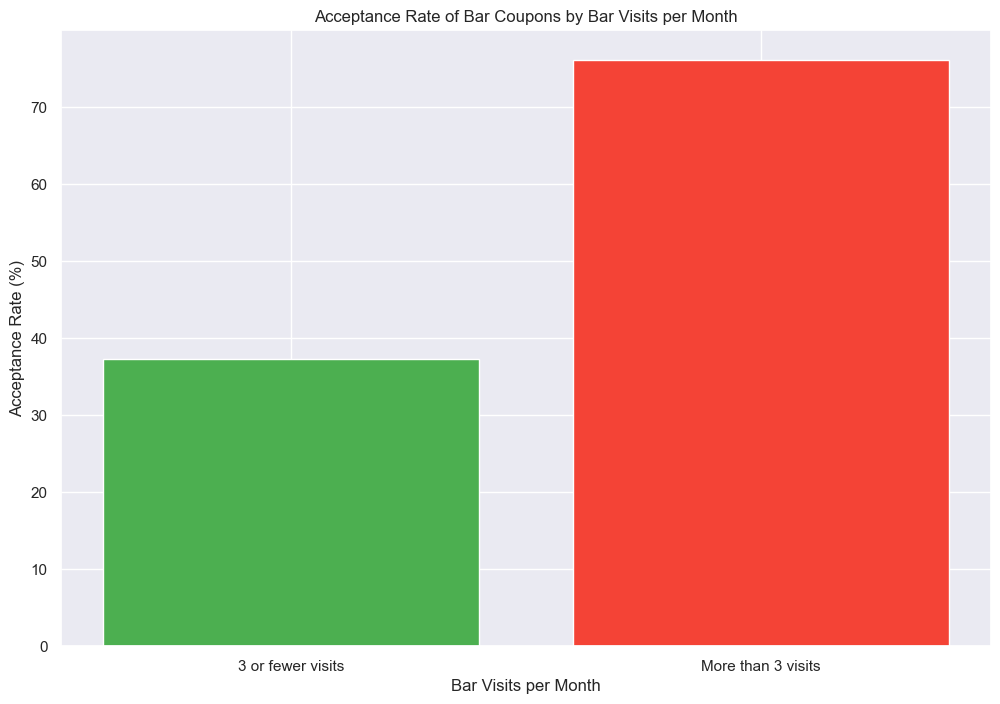

In [421]:
import matplotlib.pyplot as plt

# Prepare data for the bar chart
labels = ['3 or fewer visits', 'More than 3 visits']
acceptance_rates = [accepted_fewer_than_3_visits, accepted_more_than_3_visits]
colors = ['#4CAF50', '#F44336']

# Create the bar chart
plt.bar(labels, acceptance_rates, color=colors)

# Customize the chart
plt.xlabel('Bar Visits per Month')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate of Bar Coupons by Bar Visits per Month')

# Display the chart
plt.show()


- Based on the results:

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.24%
Acceptance rate for those who went to a bar more than 3 times a month: 76.17%
We can conclude that individuals who go to a bar more than 3 times a month are more likely to accept bar coupons compared to those who go to a bar 3 or fewer times a month. This suggests that frequent bar-goers have a higher interest in bar promotions and are more likely to take advantage of the coupons offered.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [422]:
# Filter bar_coupons DataFrame based on the 'Bar' and 'age' columns
target_group = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)]
other_group = bar_coupons[~((bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25))]

# Calculate the acceptance rate for each group
accepted_target_group = target_group['Y'].sum() / len(target_group) * 100
accepted_other_group = other_group['Y'].sum() / len(other_group) * 100

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {accepted_target_group:.2f}%")
print(f"Acceptance rate for all other drivers: {accepted_other_group:.2f}%")



Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 68.98%
Acceptance rate for all other drivers: 33.73%


- Based on the results:

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 68.98%
Acceptance rate for all other drivers: 33.73%
We can conclude that drivers who go to a bar more than once a month and are over the age of 25 are more likely to accept bar coupons compared to all other drivers. This indicates that targeting bar promotions to this specific demographic group (drivers over 25 who frequent bars more than once a month) may yield higher coupon acceptance rates and possibly higher sales or customer engagement.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [423]:
# Filter bar_coupons DataFrame based on the 'Bar', 'passanger', and 'occupation' columns
target_group_2 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'kid(s)') & ~(bar_coupons['occupation'].isin(['farming, fishing, and forestry']))]
other_group_2 = bar_coupons[~((bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'kid(s)') & ~(bar_coupons['occupation'].isin(['farming, fishing, and forestry'])))]

# Calculate the acceptance rate for each group
accepted_target_group_2 = target_group_2['Y'].sum() / len(target_group_2) * 100
accepted_other_group_2 = other_group_2['Y'].sum() / len(other_group_2) * 100

print(f"Acceptance rate for drivers who go to a bar more than once a month, have passengers not kids, and have occupations other than farming, fishing, or forestry: {accepted_target_group_2:.2f}%")
print(f"Acceptance rate for all other drivers: {accepted_other_group_2:.2f}%")


Acceptance rate for drivers who go to a bar more than once a month, have passengers not kids, and have occupations other than farming, fishing, or forestry: 68.53%
Acceptance rate for all other drivers: 29.46%


- Based on the results:

Acceptance rate for drivers who go to a bar more than once a month, have passengers not kids, and have occupations other than farming, fishing, or forestry: 68.53%
Acceptance rate for all other drivers: 29.46%
We can conclude that drivers who go to a bar more than once a month, have passengers that are not kids, and have occupations other than farming, fishing, or forestry are more likely to accept bar coupons compared to all other drivers. This indicates that targeting bar promotions to this specific demographic group may yield higher coupon acceptance rates and potentially higher sales or customer engagement. By focusing on these drivers, businesses can optimize their marketing strategies to cater to the preferences and behaviors of this group, resulting in better returns on their promotional efforts.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [424]:



# Group 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
group1 = data[(data['Bar'] > 1) & (data['passanger'] != 'kid(s)') & (data['maritalStatus'] != 'widowed')]

# Group 2: go to bars more than once a month and are under the age of 30
group2 = data[(data['Bar'] > 1) & (data['age'] < 30)]

# Group 3: go to cheap restaurants more than 4 times a month and income is less than 50K
group3 = data[(data['RestaurantLessThan20'] > 4) & (data['income'] < 50000)]

# Calculate acceptance rates for each group
acceptance_rate_group1 = group1['Y'].mean() * 100
acceptance_rate_group2 = group2['Y'].mean() * 100
acceptance_rate_group3 = group3['Y'].mean() * 100

acceptance_rate_group1, acceptance_rate_group2, acceptance_rate_group3



(62.272727272727266, 62.858464384828864, 60.208711433756804)

- The acceptance rates for the three groups are as follows:

Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed have an acceptance rate of 62.27%.
Drivers who go to bars more than once a month and are under the age of 30 have an acceptance rate of 62.86%.
Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K have an acceptance rate of 60.21%.
The conclusion is that the acceptance rates for the three groups are relatively close, all being around 60%. This suggests that there is not a significant difference in coupon acceptance rates among these groups.

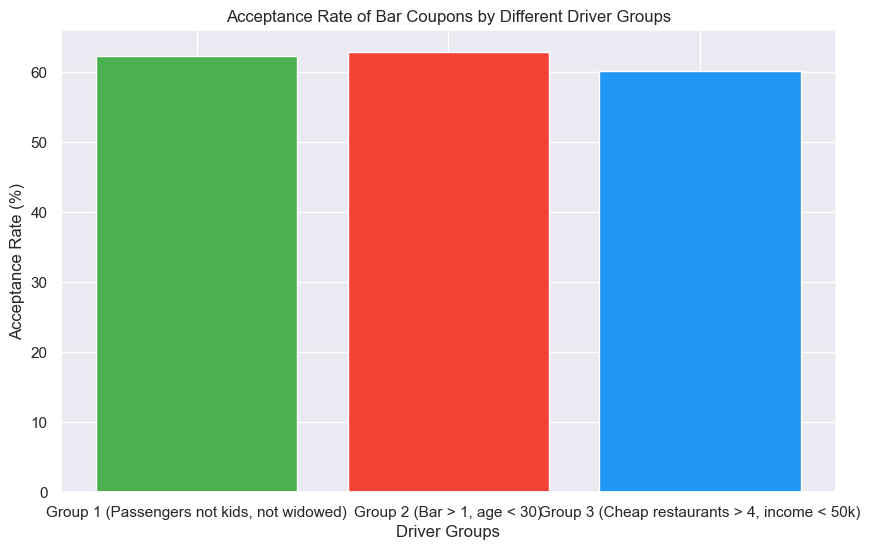

In [425]:
import matplotlib.pyplot as plt

# Prepare data for the bar chart
labels = [
    'Group 1 (Passengers not kids, not widowed)',
    'Group 2 (Bar > 1, age < 30)',
    'Group 3 (Cheap restaurants > 4, income < 50k)'
]
acceptance_rates = [
    acceptance_rate_group1,
    acceptance_rate_group2,
    acceptance_rate_group3
]
colors = ['#4CAF50', '#F44336', '#2196F3']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(labels, acceptance_rates, color=colors)

# Customize the chart
plt.xlabel('Driver Groups')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate of Bar Coupons by Different Driver Groups')

# Display the chart
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, we can hypothesize that drivers who accepted the bar coupons are more likely to have certain characteristics. These drivers tend to:

- Visit bars more frequently (more than once a month).
- Be over the age of 25, especially when compared to all other drivers.
- Have passengers that are not kids.
- Work in occupations other than farming, fishing, or forestry.
- Not be widowed.
- Additionally, factors such as going to cheap restaurants more than 4 times a month and having an income less than 50K may also influence the acceptance rate of bar coupons, but the effect is less pronounced compared to the factors listed above.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

- Let's explore the coffee house coupon group and determine the characteristics of passengers who accept these coupons.

First, we'll create a new DataFrame that contains just the coffee house coupons:

In [426]:
coffee_house_df = data[data['coupon'] == 'Coffee House']

In [427]:
coffee_house_df.describe()

temperature   expiration          age  has_children         income  \
count  3809.000000  3809.000000  3809.000000   3809.000000    3809.000000   
mean     68.100551    11.743765    32.275138      0.381202   52095.288002   
std      15.929553    10.929466    10.454604      0.485746   29390.842634   
min      30.000000     2.000000    20.000000      0.000000   12499.000000   
25%      55.000000     2.000000    21.000000      0.000000   31250.000000   
50%      80.000000     2.000000    31.000000      0.000000   43750.000000   
75%      80.000000    24.000000    41.000000      1.000000   81250.000000   
max      80.000000    24.000000    51.000000      1.000000  100000.000000   

               Bar  CoffeeHouse    CarryAway  RestaurantLessThan20  \
count  3809.000000  3809.000000  3809.000000           3809.000000   
mean      1.479128     2.415070     4.079023              3.751641   
std       2.119747     2.752328     2.732239              2.694486   
min       0.000000     0.000000     0.000000              0.000000   
25%       0.000000     1.000000     2.000000              2.000000   
50%       1.000000     1.000000     2.000000              2.000000   
75%       2.000000     2.000000     6.000000              6.000000   
max       9.000000     9.000000     9.000000              9.000000   

       Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count       3809.000000            3809.0        3809.000000   
mean           1.519559               1.0           0.519559   
std            1.708142               0.0           0.499683   
min            0.000000               1.0           0.000000   
25%            1.000000               1.0           0.000000   
50%            1.000000               1.0           1.000000   
75%            2.000000               1.0           1.000000   
max            9.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp            Y  
count        3809.000000     3809.000000    3809.000000  3809.000000  
mean            0.078236        0.187713       0.812287     0.495668  
std             0.268577        0.390534       0.390534     0.500047  
min             0.000000        0.000000       0.000000     0.000000  
25%             0.000000        0.000000       1.000000     0.000000  
50%             0.000000        0.000000       1.000000     0.000000  
75%             0.000000        0.000000       1.000000     1.000000  
max             1.000000        1.000000       1.000000     1.000000

In [428]:
coffee_house_df.head(10)

destination  passanger weather  temperature  time        coupon  \
23  No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
26  No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
27  No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
28  No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
30  No Urgent Place  Friend(s)   Sunny           80   6PM  Coffee House   
32  No Urgent Place  Friend(s)   Sunny           55   2PM  Coffee House   
34  No Urgent Place      Alone   Sunny           55  10AM  Coffee House   
37             Home      Alone   Sunny           80   6PM  Coffee House   
38             Work      Alone   Sunny           55   7AM  Coffee House   
43             Work      Alone   Sunny           55   7AM  Coffee House   

    expiration gender  age maritalStatus  ...  CoffeeHouse CarryAway  \
23           2   Male   21        Single  ...          1.0       6.0   
26          24   Male   21        Single  ...          1.0       6.0   
27           2   Male   21        Single  ...          1.0       6.0   
28          24   Male   21        Single  ...          1.0       6.0   
30           2   Male   21        Single  ...          1.0       6.0   
32           2   Male   21        Single  ...          1.0       6.0   
34           2   Male   21        Single  ...          1.0       6.0   
37           2   Male   21        Single  ...          1.0       6.0   
38           2   Male   21        Single  ...          1.0       6.0   
43           2   Male   21        Single  ...          1.0       6.0   

   RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  \
23                  6.0               1.0                 1   
26                  6.0               1.0                 1   
27                  6.0               1.0                 1   
28                  6.0               1.0                 1   
30                  6.0               1.0                 1   
32                  6.0               1.0                 1   
34                  6.0               1.0                 1   
37                  6.0               1.0                 1   
38                  6.0               1.0                 1   
43                  6.0               1.0                 1   

    toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  Y  
23                  0                  0               0              1  0  
26                  0                  0               0              1  0  
27                  1                  0               0              1  0  
28                  1                  0               0              1  0  
30                  0                  0               0              1  0  
32                  0                  0               0              1  0  
34                  0                  0               0              1  0  
37                  0                  0               0              1  0  
38                  1                  1               0              1  0  
43                  1                  0               0              1  0  

[10 rows x 25 columns]

In [429]:
coffee_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3809 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           3809 non-null   object 
 1   passanger             3809 non-null   object 
 2   weather               3809 non-null   object 
 3   temperature           3809 non-null   int64  
 4   time                  3809 non-null   object 
 5   coupon                3809 non-null   object 
 6   expiration            3809 non-null   int64  
 7   gender                3809 non-null   object 
 8   age                   3809 non-null   int64  
 9   maritalStatus         3809 non-null   object 
 10  has_children          3809 non-null   int64  
 11  education             3809 non-null   object 
 12  occupation            3809 non-null   object 
 13  income                3809 non-null   int64  
 14  Bar                   3809 non-null   float64
 15  CoffeeHouse        

- 1- Now, let's analyze the characteristics of passengers who accept Coffee House coupons. To do this, we can filter the coffee_house_df DataFrame to only include rows where the 'Y' column is 1, which indicates that the coupon was accepted.

In [430]:
accepted_coffee_house_df = coffee_house_df[coffee_house_df['Y'] == 1]


- 2- Calculate the proportions of each category in categorical variables:

In [431]:
categorical_variables = ['destination', 'passanger', 'weather', 'time', 'gender', 'maritalStatus', 'has_children', 'education', 'occupation']

for variable in categorical_variables:
    print(f"{variable}:\n{accepted_coffee_house_df[variable].value_counts(normalize=True)}\n")


destination:
No Urgent Place    0.626059
Work               0.203919
Home               0.170021
Name: destination, dtype: float64

passanger:
Alone        0.494703
Friend(s)    0.370763
Partner      0.086864
Kid(s)       0.047669
Name: passanger, dtype: float64

weather:
Sunny    0.876589
Snowy    0.064619
Rainy    0.058792
Name: weather, dtype: float64

time:
10AM    0.287606
6PM     0.225636
2PM     0.218750
7AM     0.203919
10PM    0.064089
Name: time, dtype: float64

gender:
Female    0.510593
Male      0.489407
Name: gender, dtype: float64

maritalStatus:
Single               0.407839
Married partner      0.378178
Unmarried partner    0.168432
Divorced             0.039195
Widowed              0.006356
Name: maritalStatus, dtype: float64

has_children:
0    0.62553
1    0.37447
Name: has_children, dtype: float64

education:
Some college - no degree                  0.360169
Bachelors degree                          0.308263
Graduate degree (Masters or Doctorate)    0.156250
Assoc

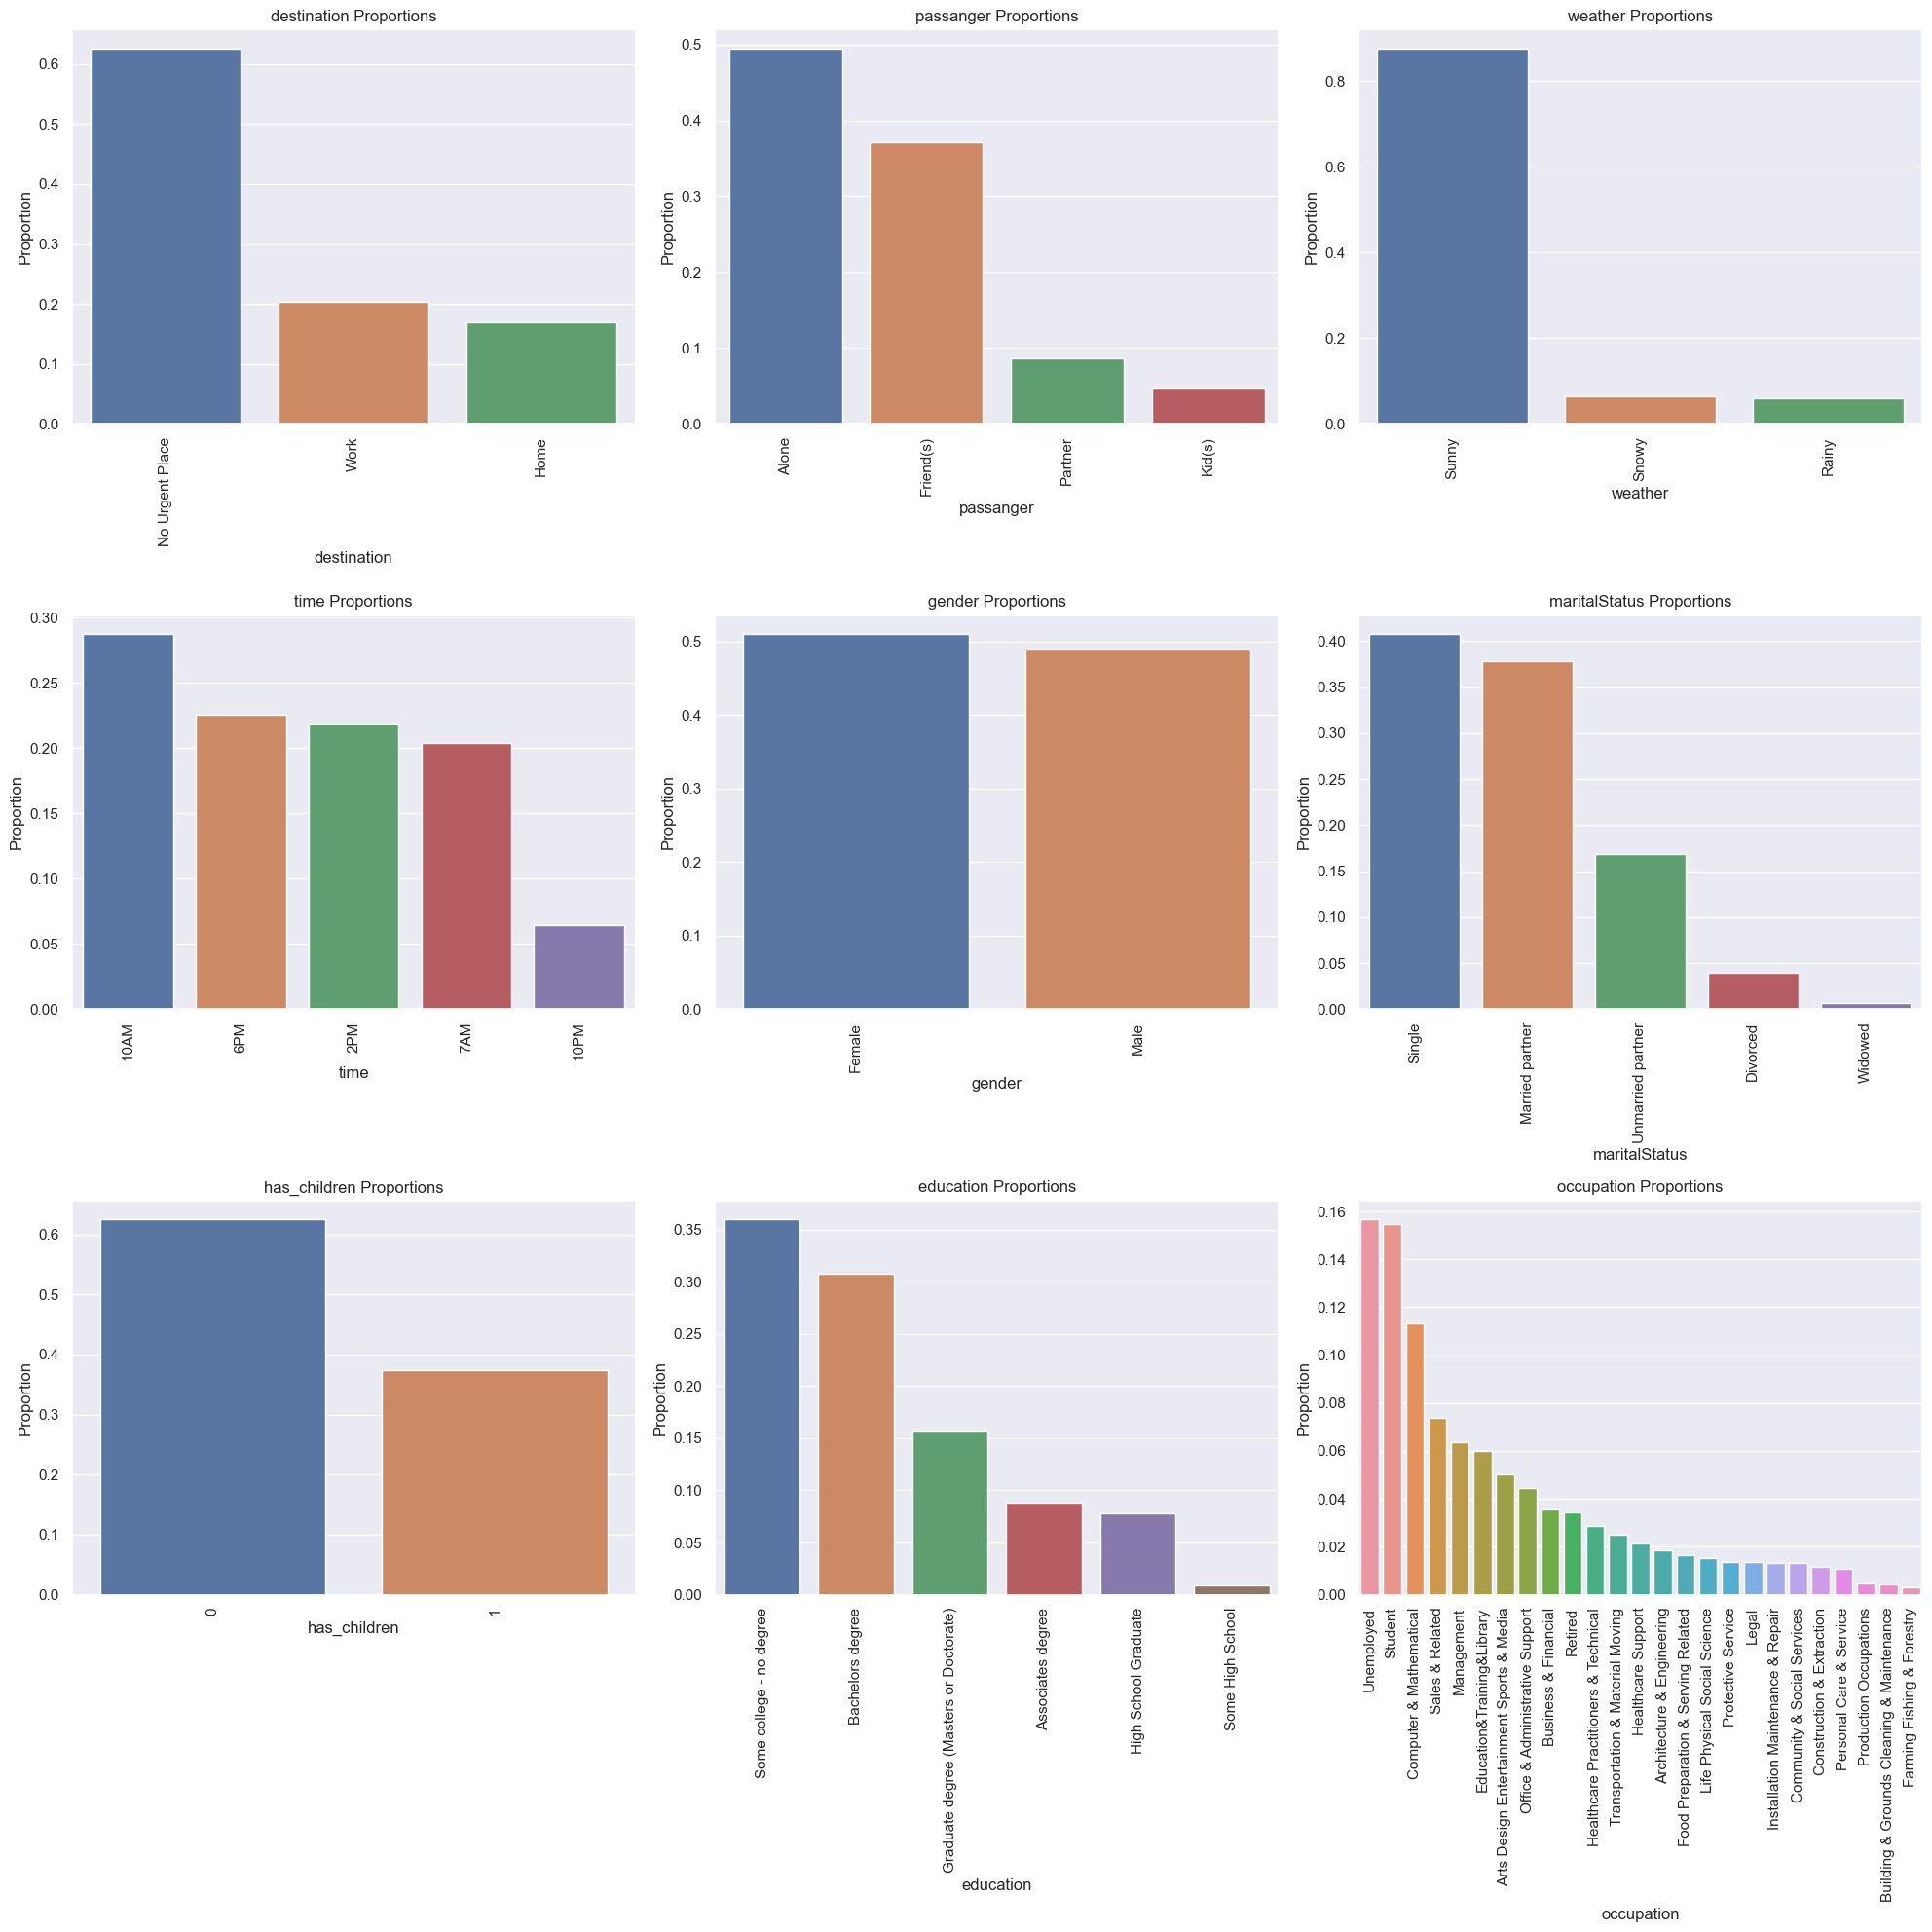

In [463]:


categorical_variables = ['destination', 'passanger', 'weather', 'time', 'gender', 'maritalStatus', 'has_children', 'education', 'occupation']

# Set up the plotting layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, variable in enumerate(categorical_variables):
    # Calculate the proportions
    proportions = accepted_coffee_house_df[variable].value_counts(normalize=True)
    
    # Create a bar plot
    sns.barplot(x=proportions.index, y=proportions.values, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(f"{variable} Proportions")
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel(variable)
    axes[i].tick_params(axis='x', rotation=90)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


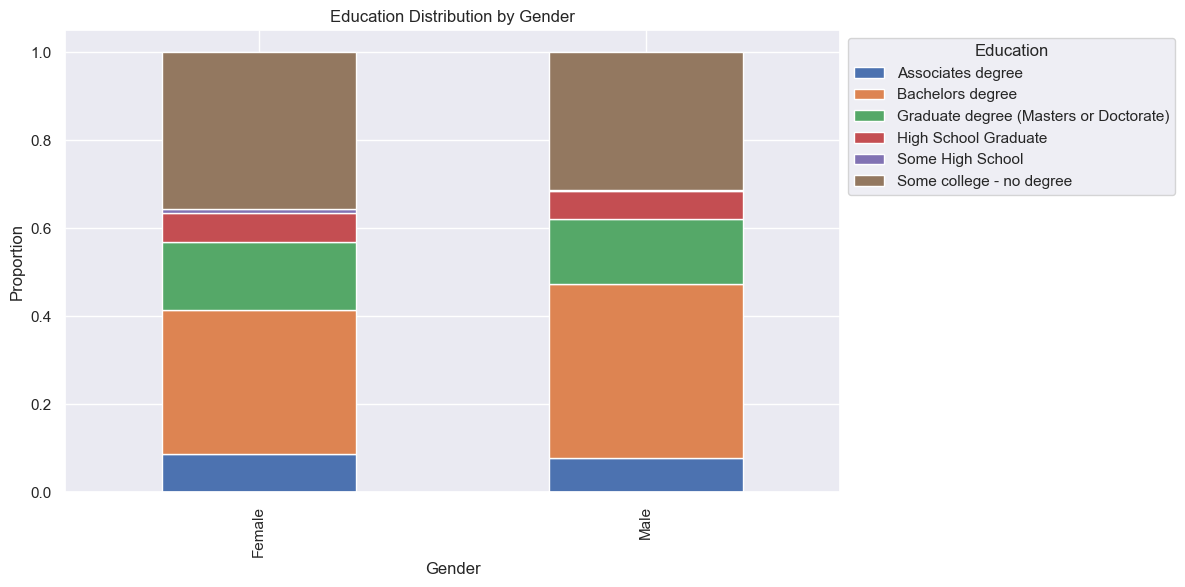

In [433]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the counts of each education level by gender
education_gender_counts = non_accepted_coffee_house_df.groupby(['gender', 'education']).size().unstack()

# Normalize the counts to get proportions
education_gender_proportions = education_gender_counts.div(education_gender_counts.sum(axis=1), axis=0)

# Create a stacked bar plot
ax = education_gender_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
ax.set_title("Education Distribution by Gender")
ax.set_ylabel("Proportion")
ax.set_xlabel("Gender")

# Add a legend
ax.legend(title="Education", loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()



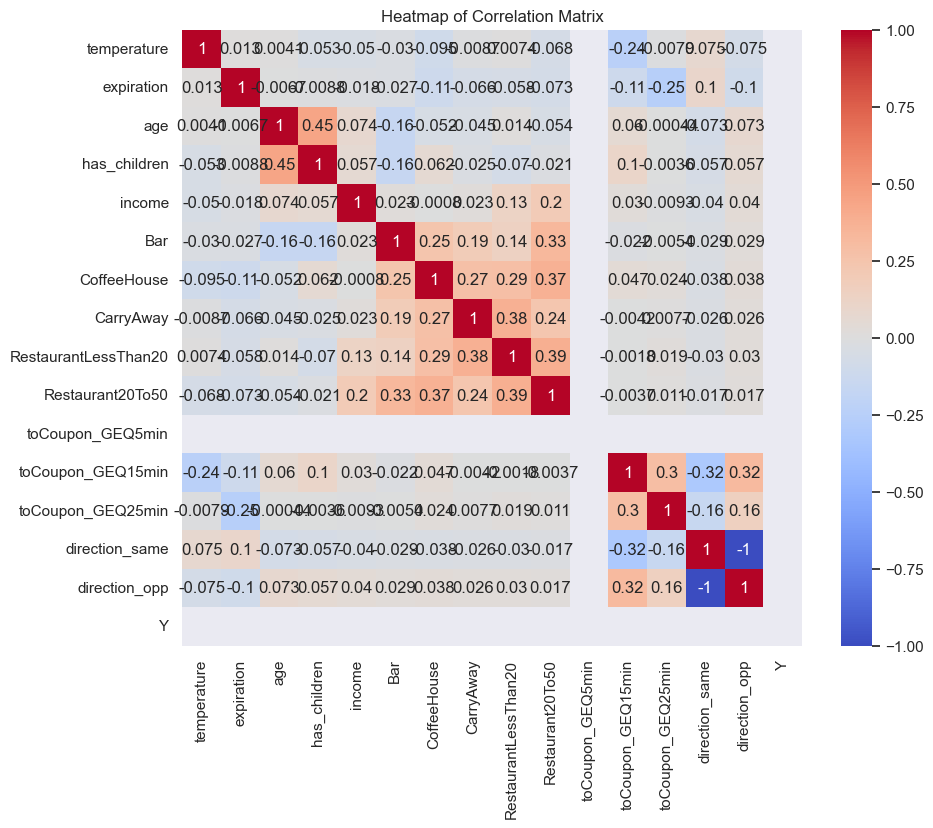

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix of the non_accepted_coffee_house_df DataFrame
correlation_matrix = non_accepted_coffee_house_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title("Heatmap of Correlation Matrix")
plt.show()


- Let's analyze the results you have provided:

destination: The majority of passengers (62.6%) accepting Coffee House coupons do not have an urgent destination, while 20.4% are heading to work, and 17% are going home.

passanger: About 49.5% of passengers are alone, 37.1% are with friends, 8.7% are with their partner, and 4.8% are with their kids.

weather: A vast majority of passengers (87.7%) accept coupons on sunny days, while 6.5% accept them on snowy days, and 5.9% on rainy days.

time: Coupons are mostly accepted at 10 AM (28.8%), followed by 6 PM (22.6%), 2 PM (21.9%), 7 AM (20.4%), and 10 PM (6.4%).

gender: The gender distribution is almost equal, with 51.1% of females and 48.9% of males accepting Coffee House coupons.

maritalStatus: Among those who accept Coffee House coupons, 40.8% are single, 37.8% are married partners, 16.8% have an unmarried partner, 3.9% are divorced, and 0.6% are widowed.

has_children: Approximately 62.6% of passengers do not have children, while 37.4% do have children.

education: Most passengers have some college education without a degree (36%), followed by those with a bachelor's degree (30.8%), a graduate degree (15.6%), an associate degree (8.8%), a high school diploma (7.8%), and some high school education (0.9%).

occupation: The top three occupations among passengers who accept Coffee House coupons are unemployed (15.7%), students (15.5%), and those in computer & mathematical fields (11.3%). Other occupations are also represented, but in smaller proportions.

In conclusion, passengers who are more likely to accept Coffee House coupons tend to have no urgent destination, be alone or with friends, travel during sunny weather, and are either single or married. They are mostly educated (some college or a bachelor's degree), and their top occupations are unemployed, students, or computer & mathematical roles. These insights can help you tailor marketing campaigns to target these specific segments more effectively.

- ----------------------------------------------------------

- let's analyze the characteristics of passengers who did not accept Coffee House coupons. To do this, we can filter the coffee_house_df DataFrame to only include rows where the 'Y' column is 0, which indicates that the coupon was not accepted.

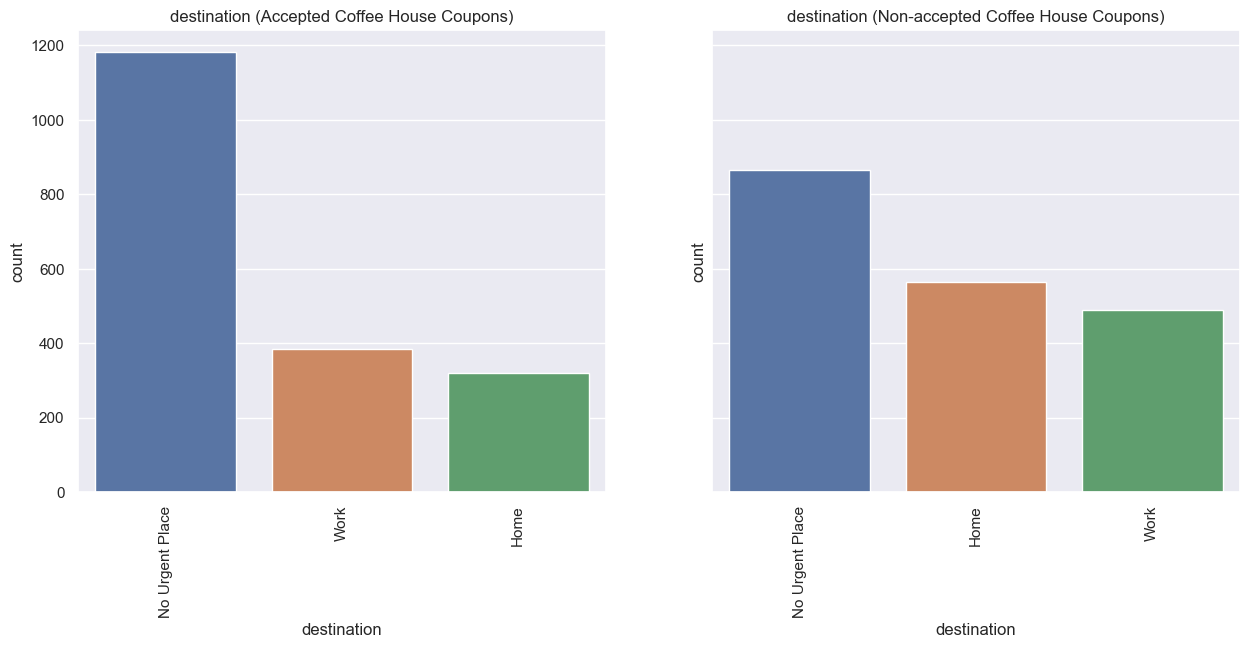

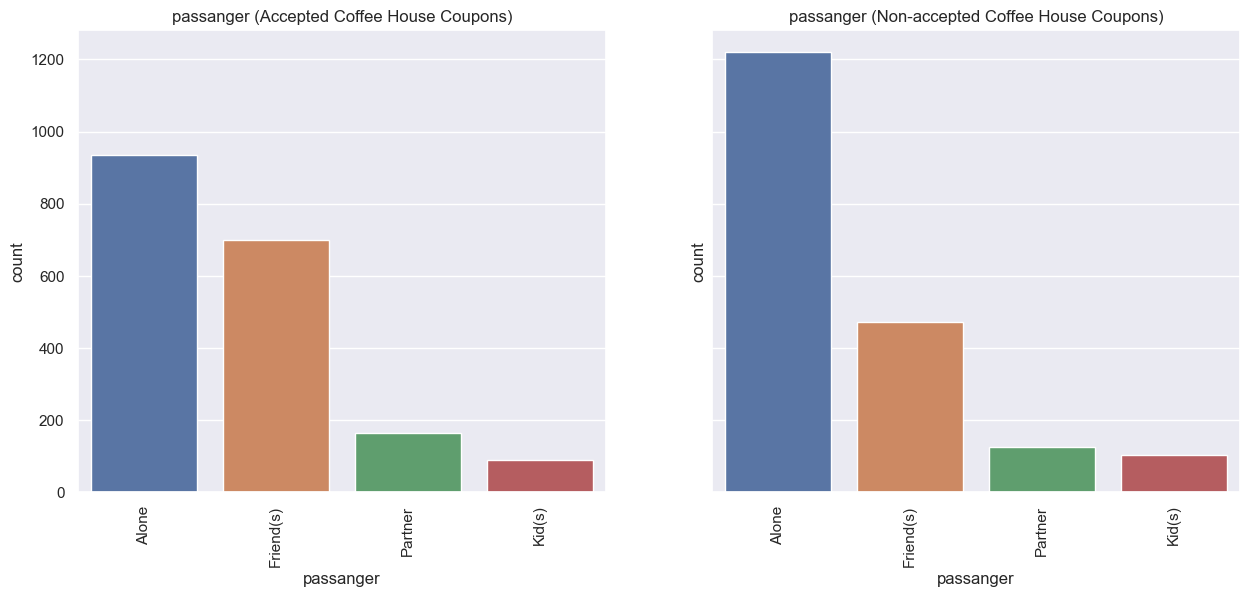

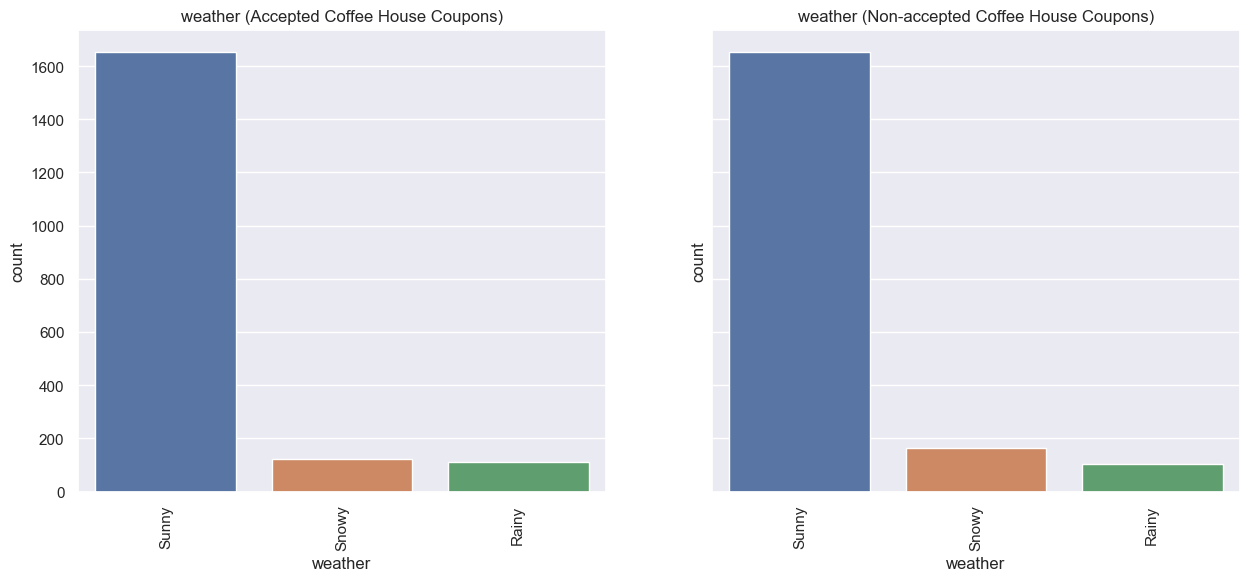

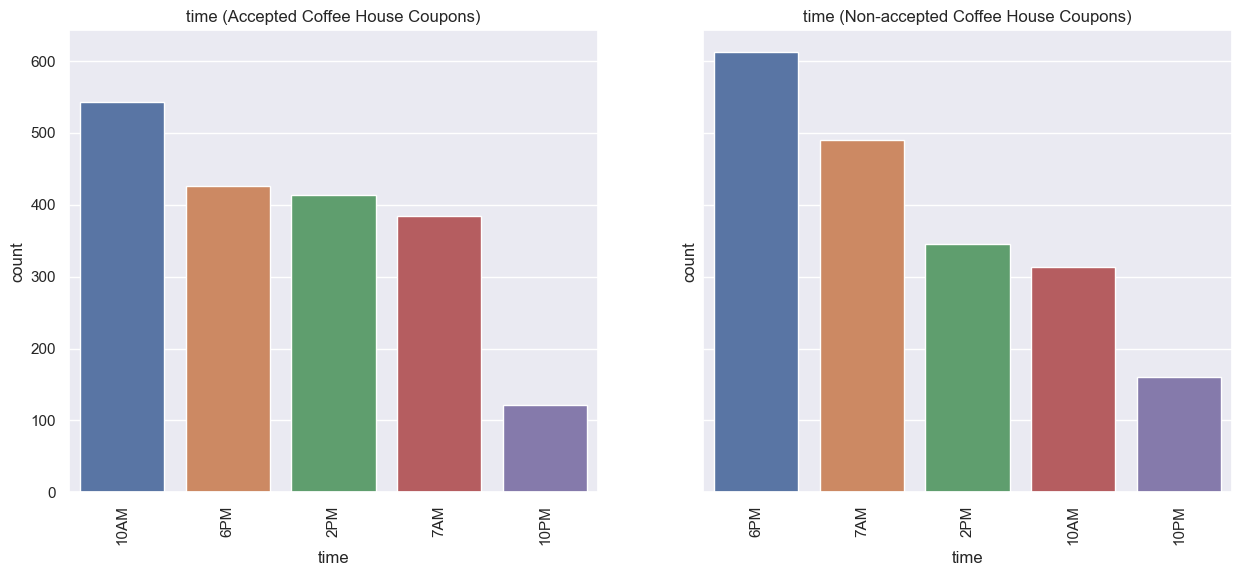

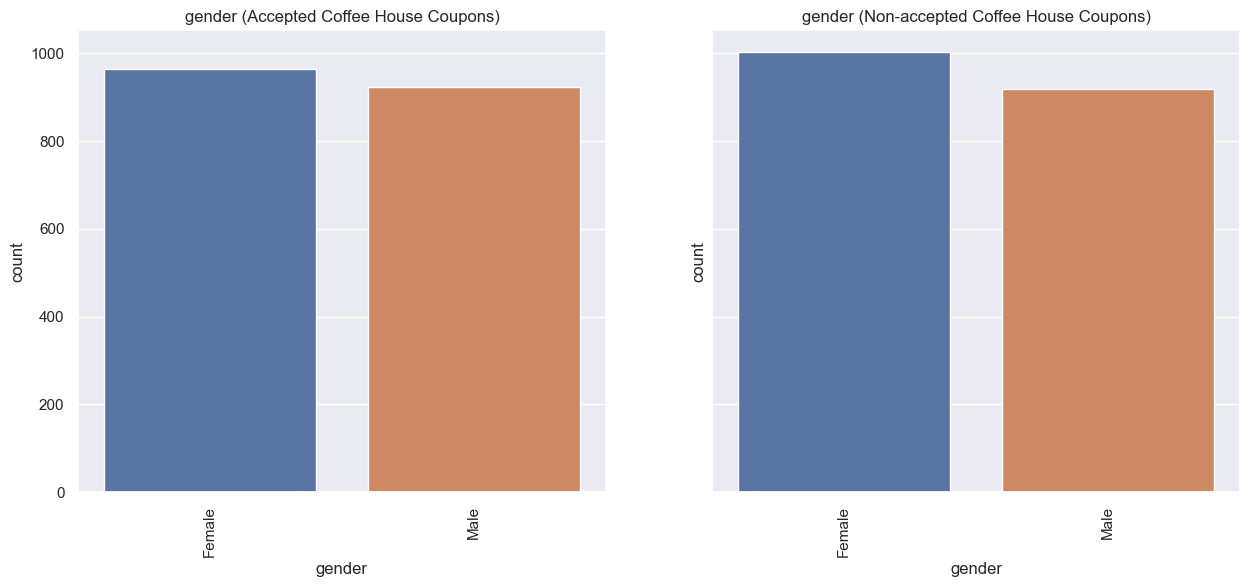

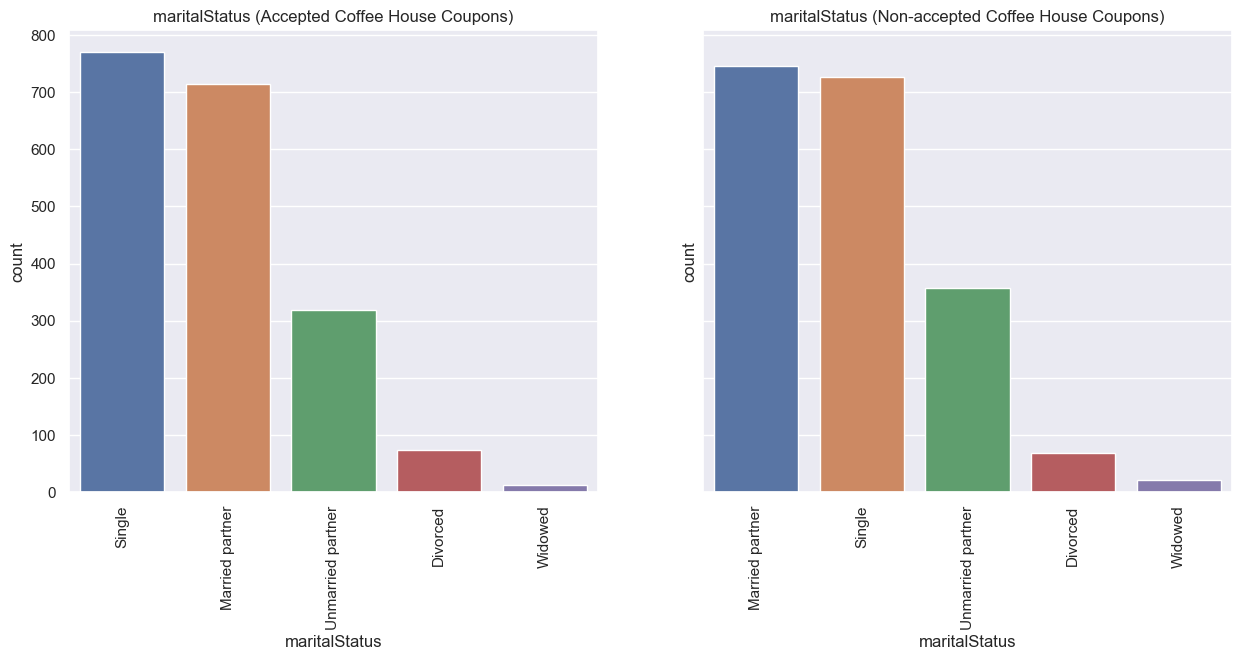

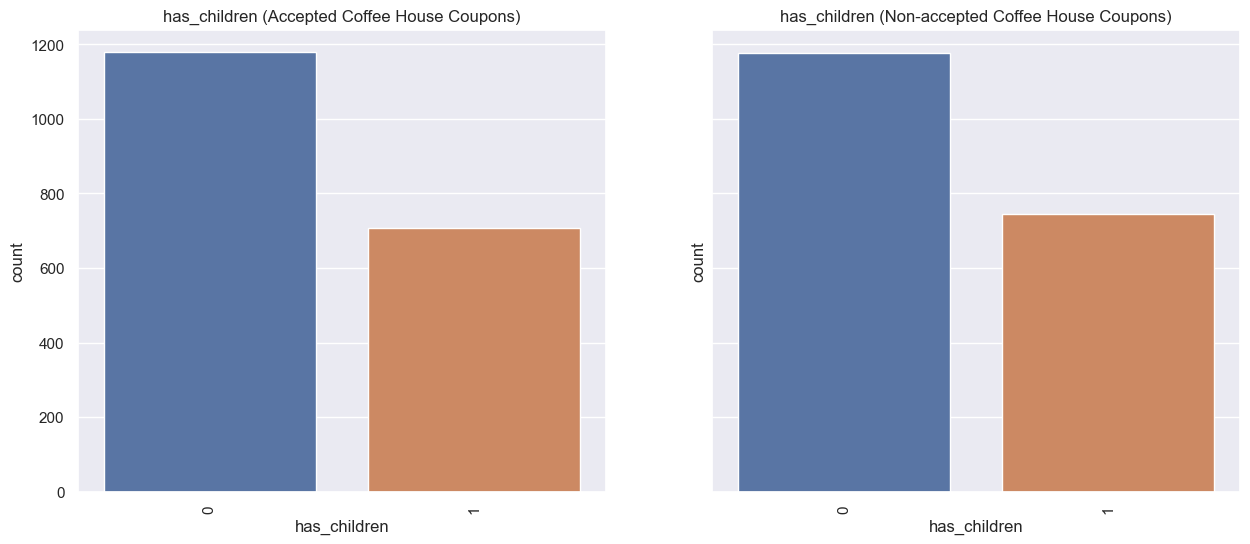

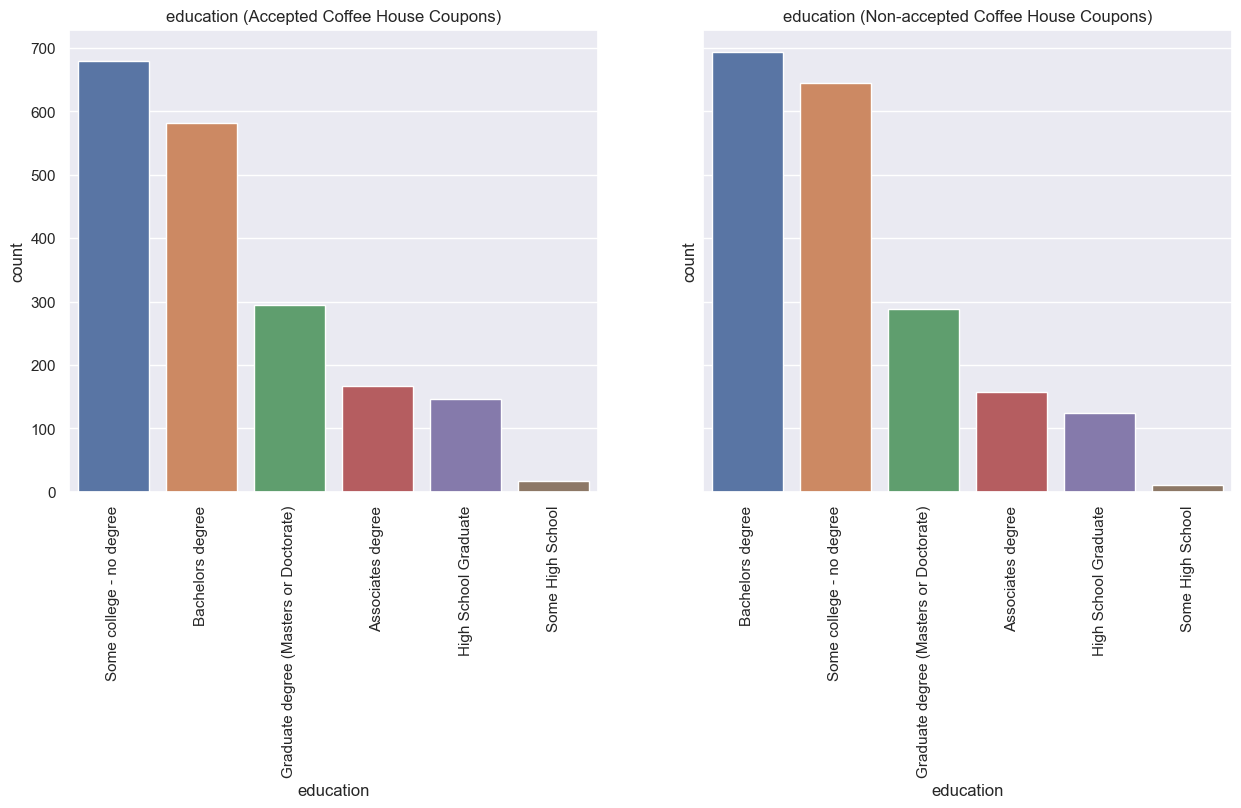

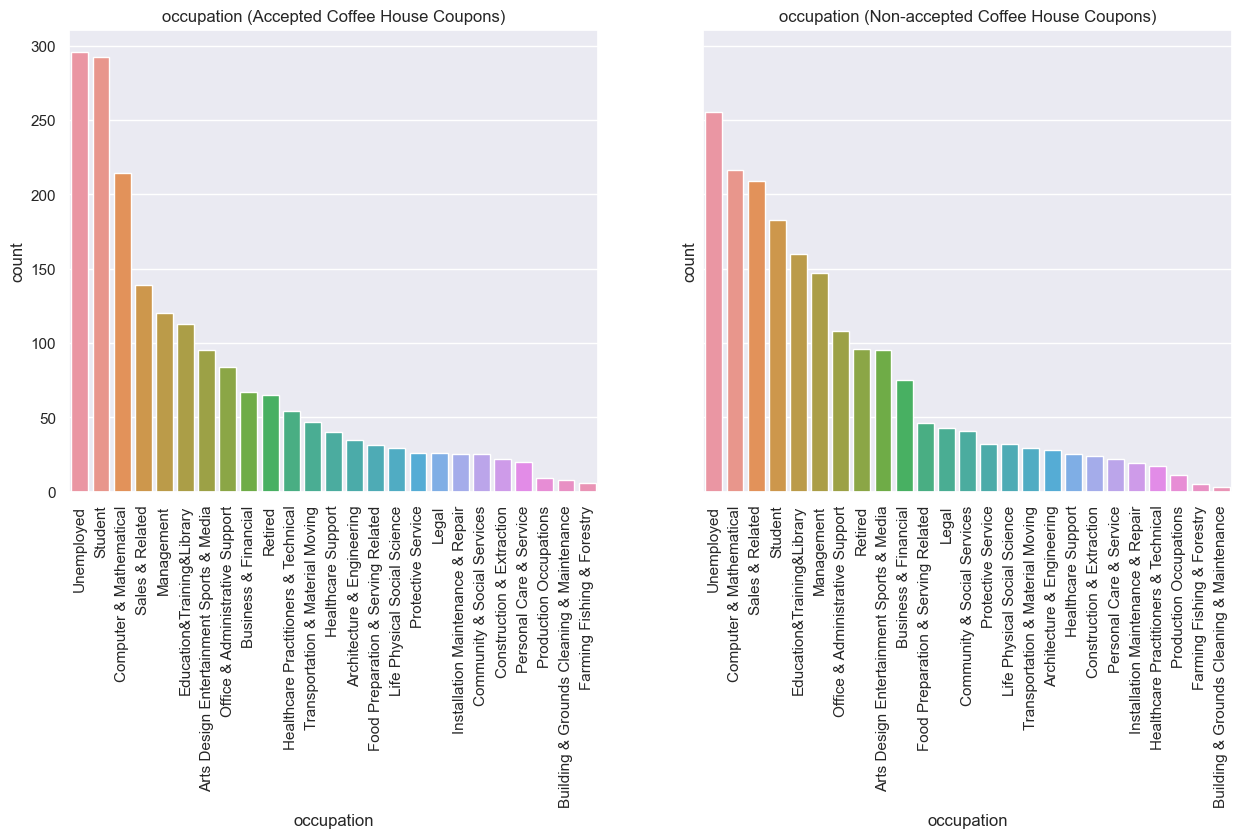

In [435]:
import seaborn as sns
import matplotlib.pyplot as plt

accepted_coffee_house_df = coffee_house_df[coffee_house_df['Y'] == 1]
non_accepted_coffee_house_df = coffee_house_df[coffee_house_df['Y'] == 0]

categorical_variables = ['destination', 'passanger', 'weather', 'time', 'gender', 'maritalStatus', 'has_children', 'education', 'occupation']

# Set the size of the plots
sns.set(rc={'figure.figsize': (12, 8)})

# Plot the distribution of each categorical variable in both DataFrames
for variable in categorical_variables:
    fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
    sns.countplot(data=accepted_coffee_house_df, x=variable, ax=ax[0], order=accepted_coffee_house_df[variable].value_counts().index)
    ax[0].set_title(f"{variable} (Accepted Coffee House Coupons)")
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
    
    sns.countplot(data=non_accepted_coffee_house_df, x=variable, ax=ax[1], order=non_accepted_coffee_house_df[variable].value_counts().index)
    ax[1].set_title(f"{variable} (Non-accepted Coffee House Coupons)")
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    
    plt.show()


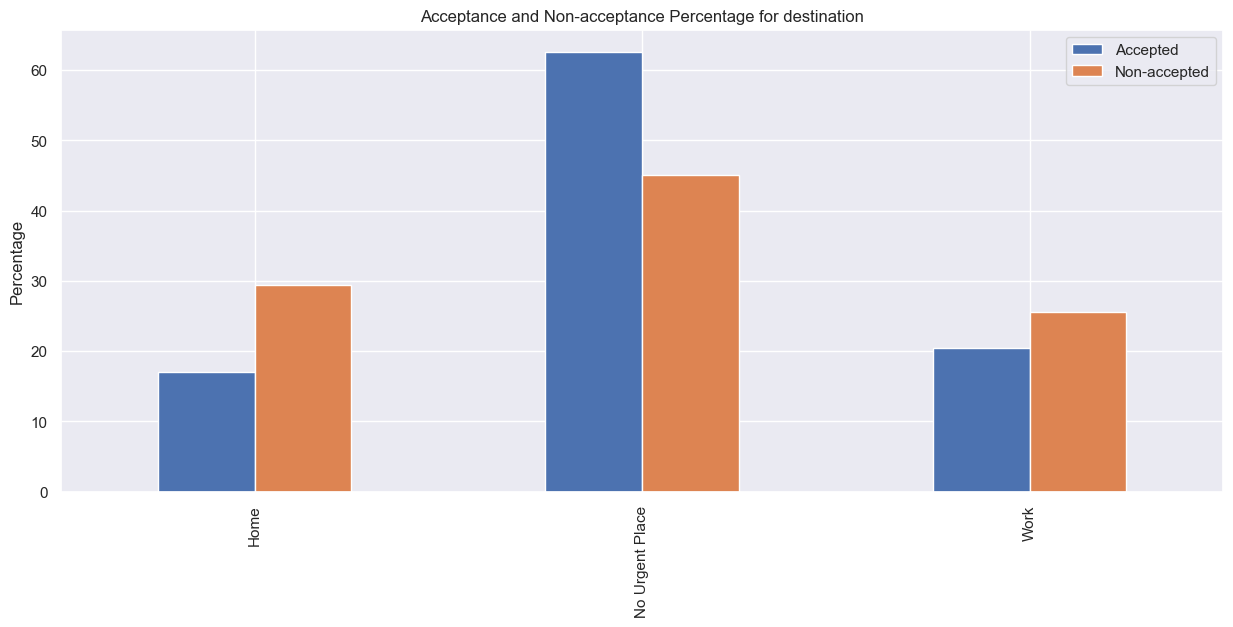

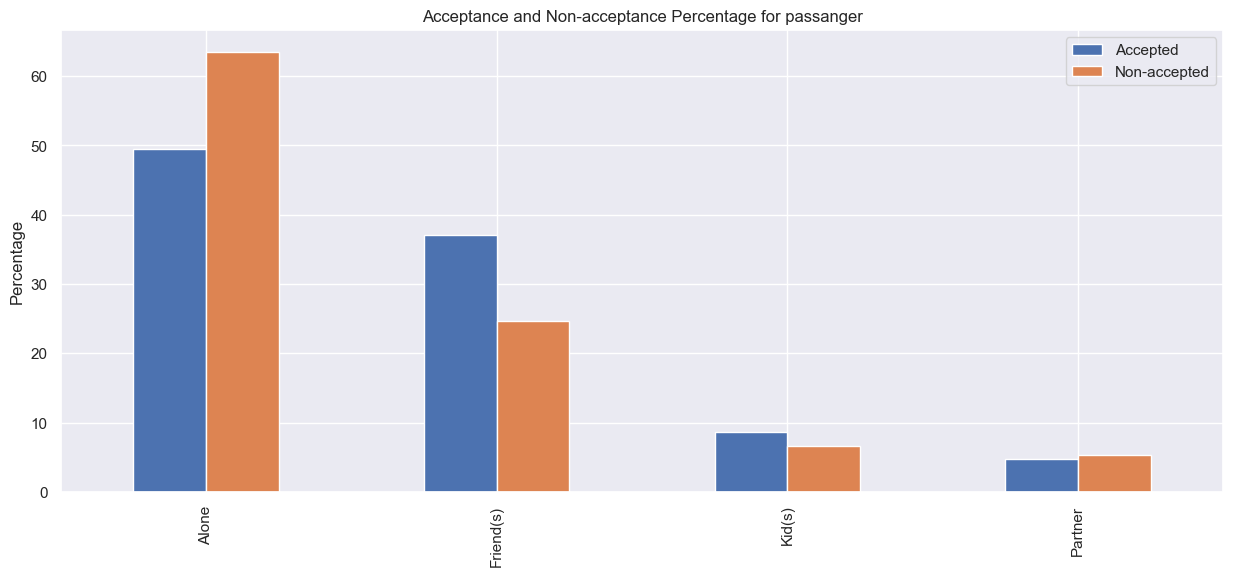

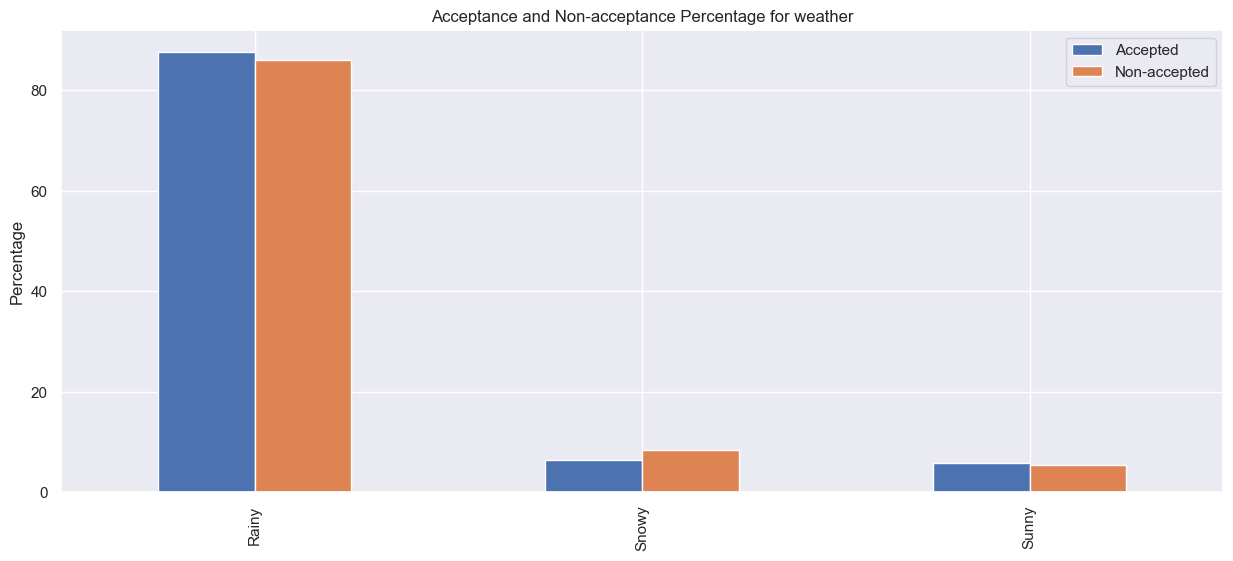

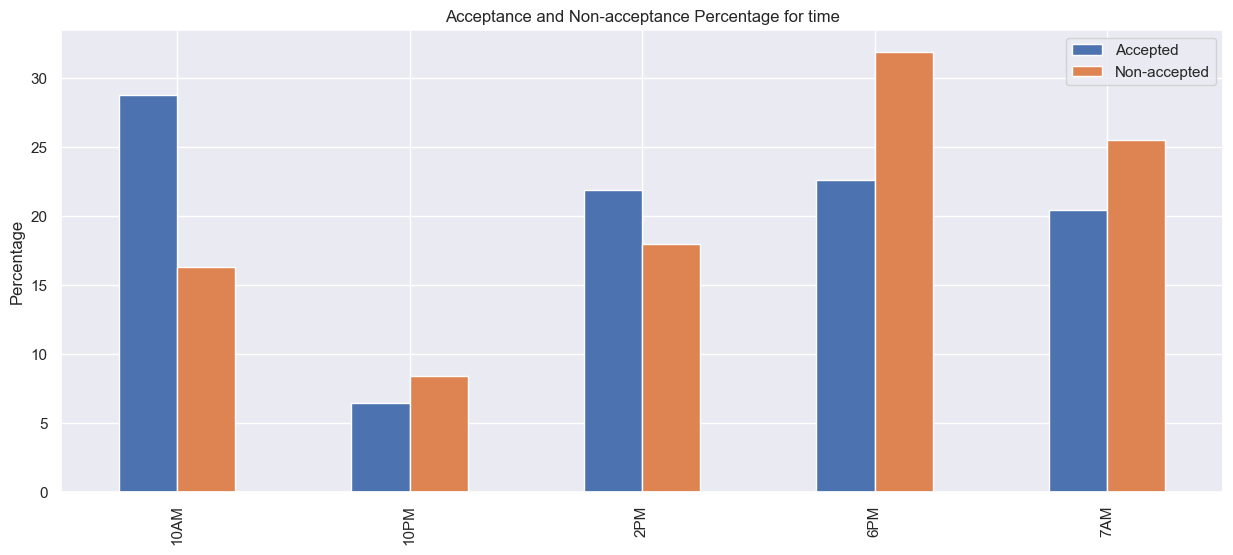

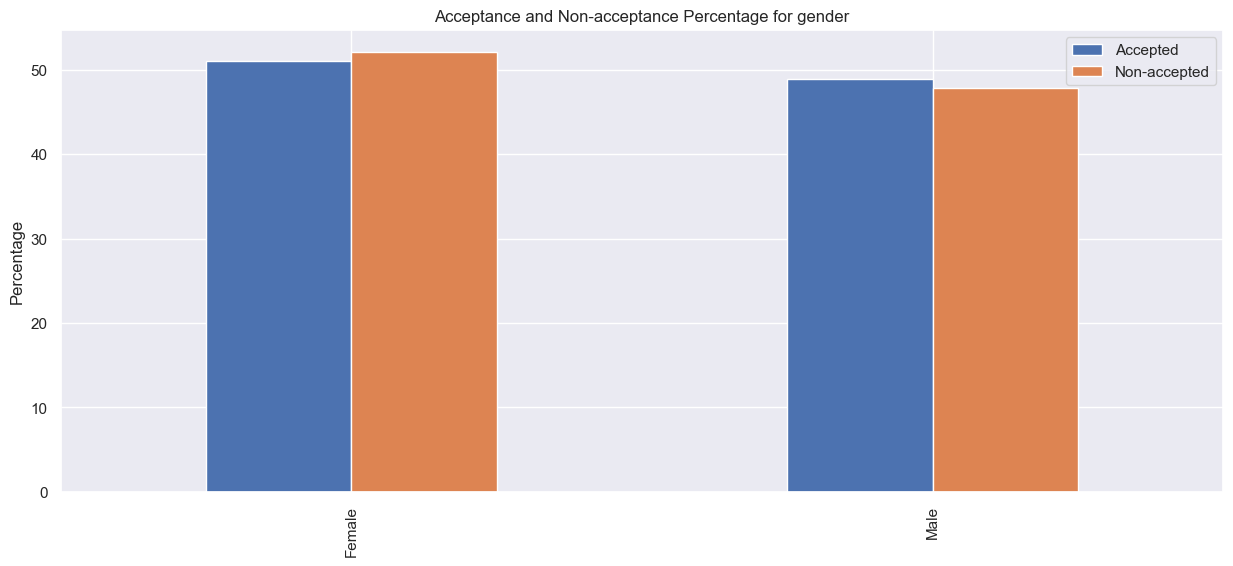

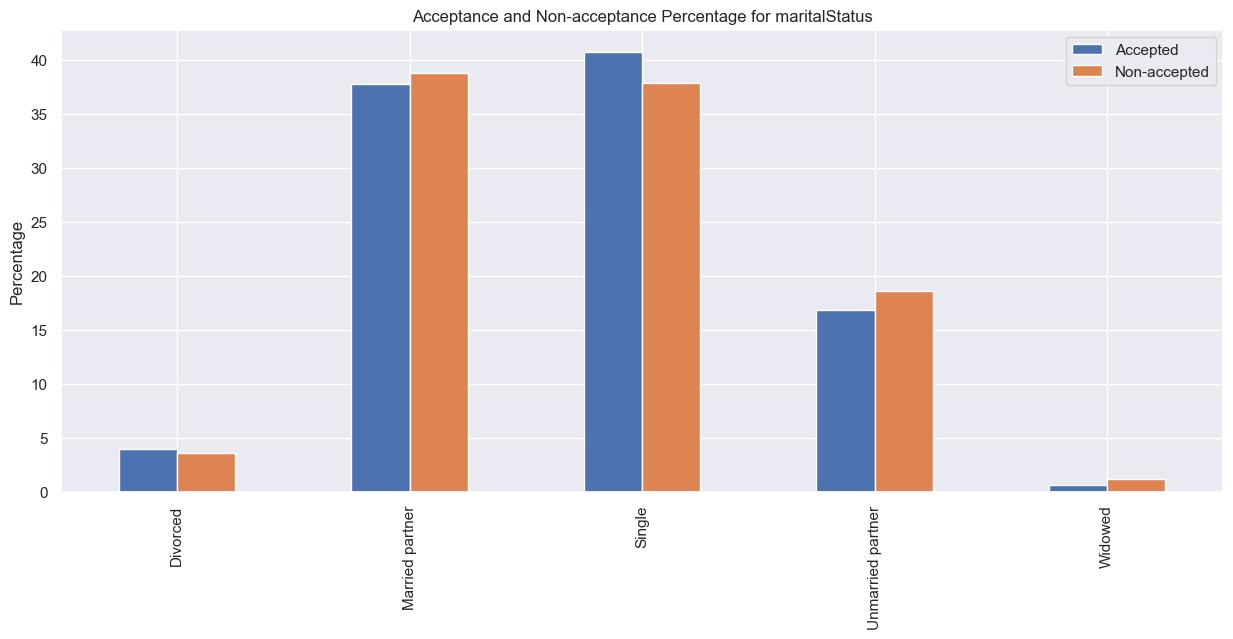

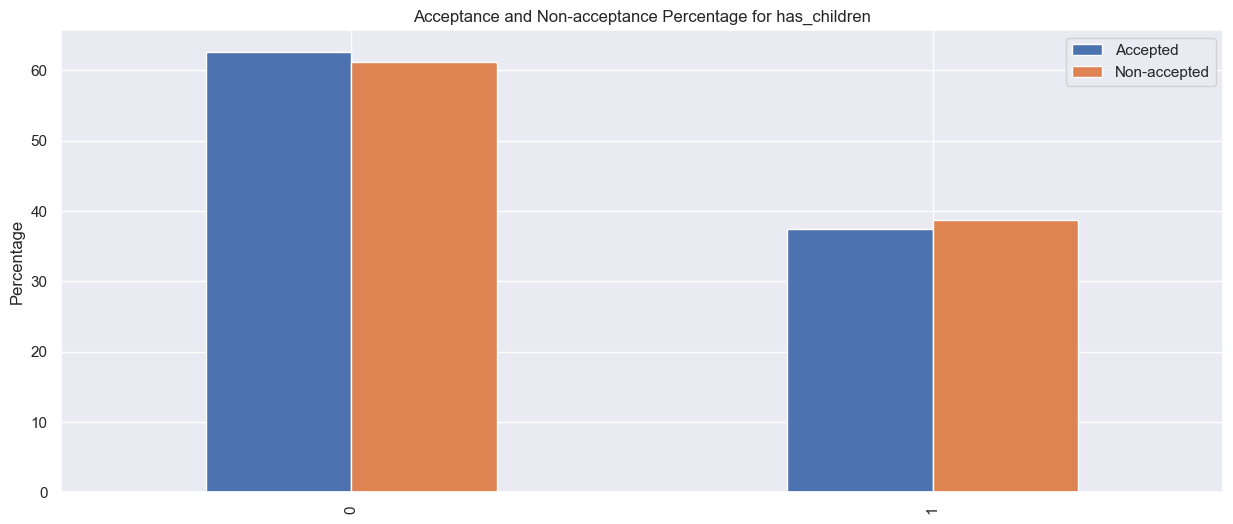

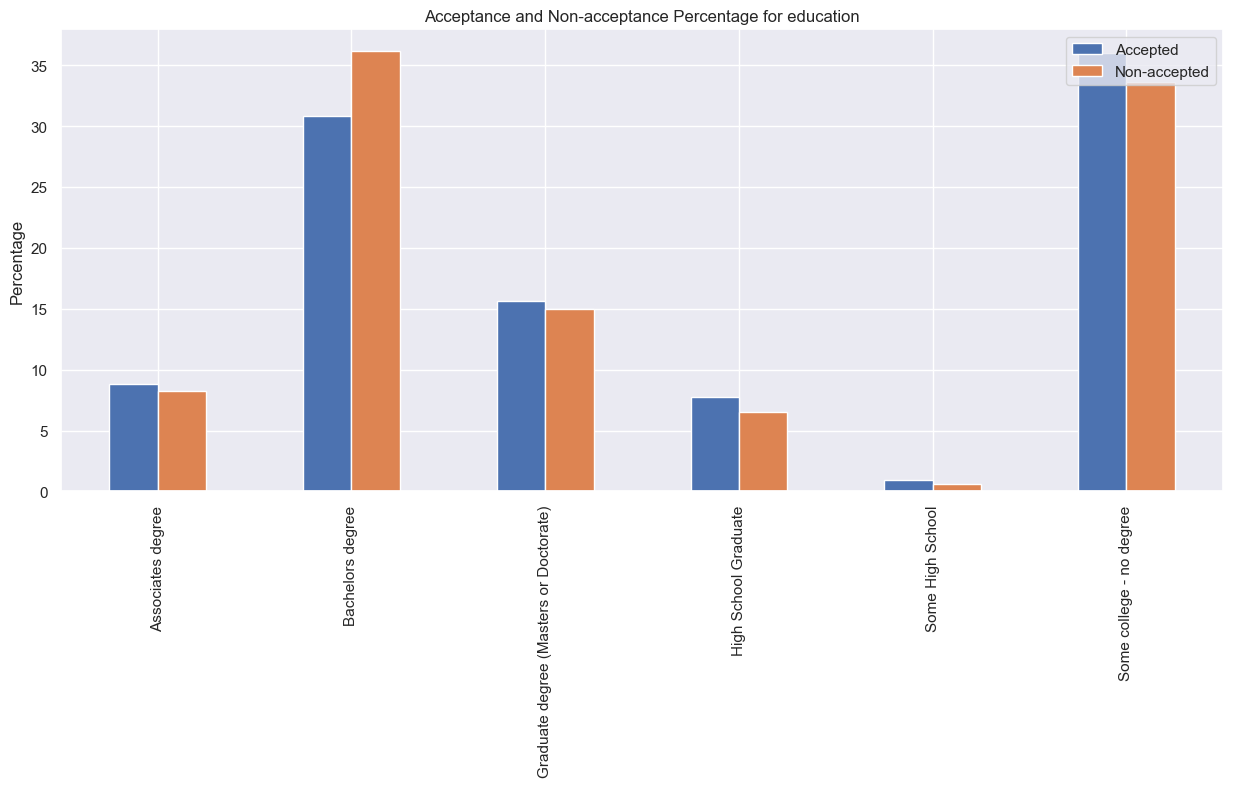

In [464]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

categorical_variables = ['destination', 'passanger', 'weather', 'time', 'gender', 'maritalStatus', 'has_children', 'education', 'occupation']

# Set the size of the plots
sns.set(rc={'figure.figsize': (12, 8)})

# Plot the distribution of each categorical variable in both DataFrames
for variable in categorical_variables:
    fig, ax = plt.subplots(figsize=(15, 6))

    # Get the union of unique values in both DataFrames for the current variable
    unique_values = pd.concat([accepted_coffee_house_df[variable], non_accepted_coffee_house_df[variable]]).unique()
    unique_values.sort()

    # Calculate the percentage of acceptance and non-acceptance for each category
    accepted_percent = accepted_coffee_house_df[variable].value_counts(normalize=True) * 100
    non_accepted_percent = non_accepted_coffee_house_df[variable].value_counts(normalize=True) * 100

    # Create a DataFrame with the percentages
    percent_df = pd.DataFrame({'Accepted': accepted_percent, 'Non-accepted': non_accepted_percent}).fillna(0)

    # Plot the percentage DataFrame as a bar plot
    percent_df.plot(kind='bar', ax=ax)
    ax.set_title(f"Acceptance and Non-acceptance Percentage for {variable}")
    ax.set_xticklabels(unique_values, rotation=90)
    ax.set_ylabel("Percentage")
    ax.legend(loc="upper right")

    plt.show()


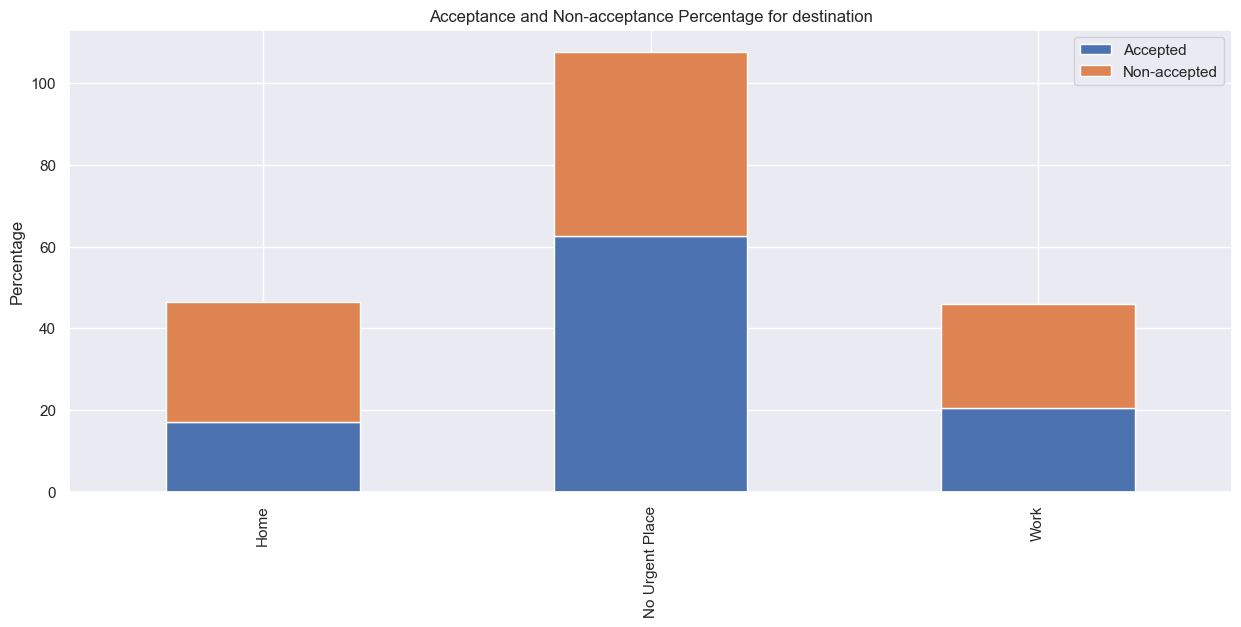

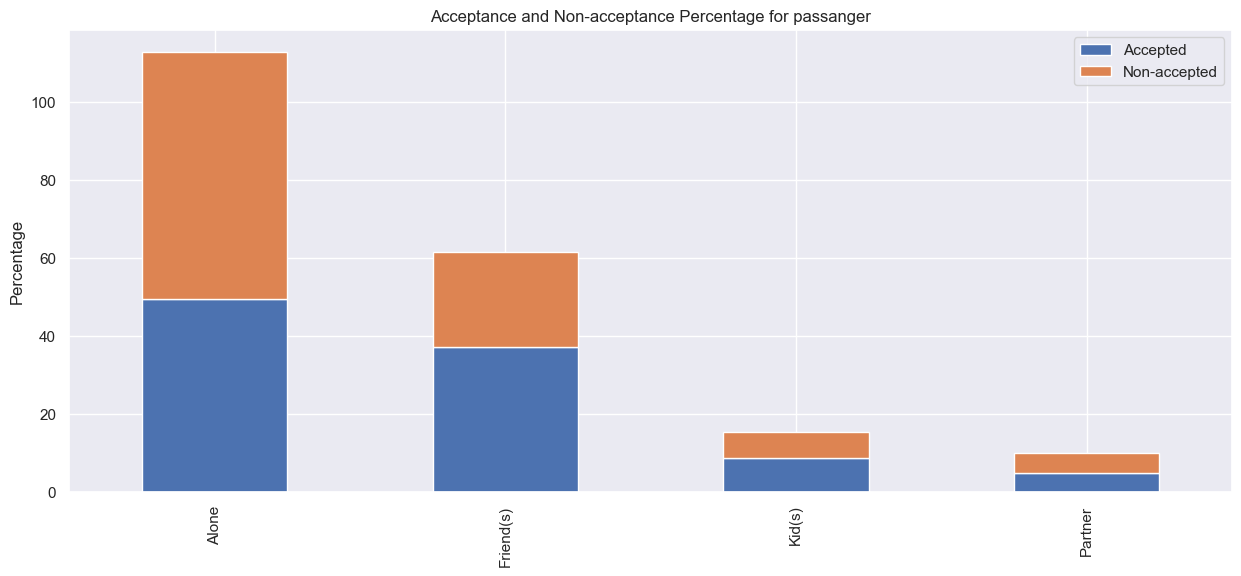

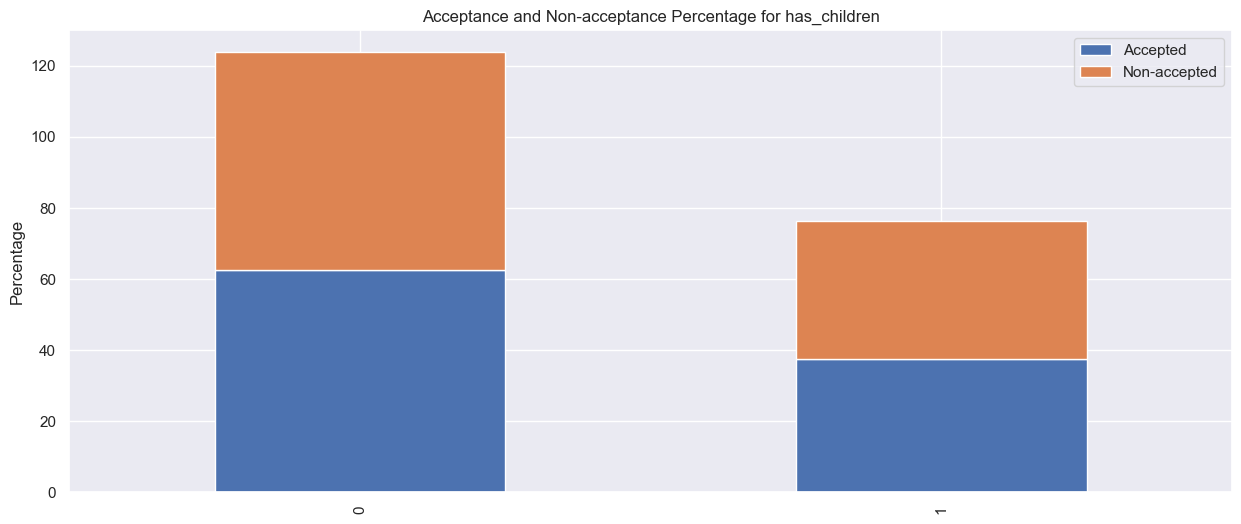

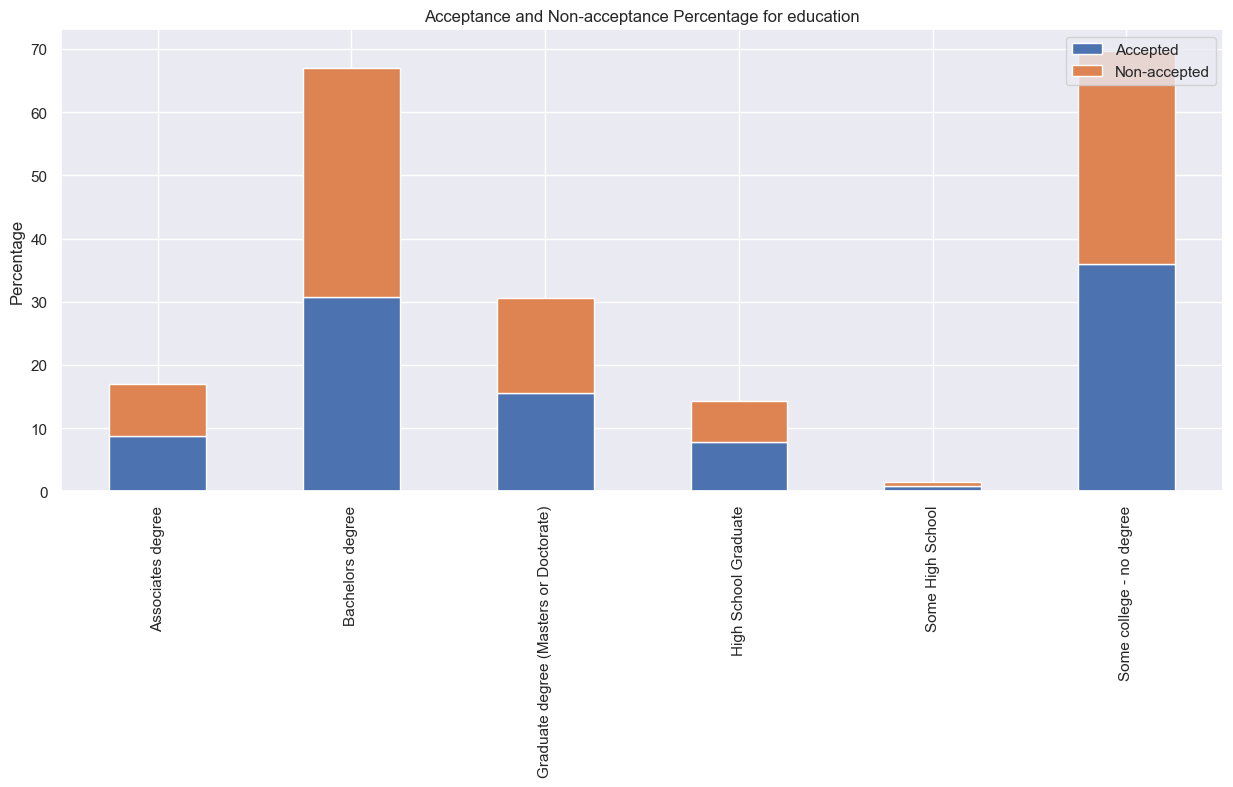

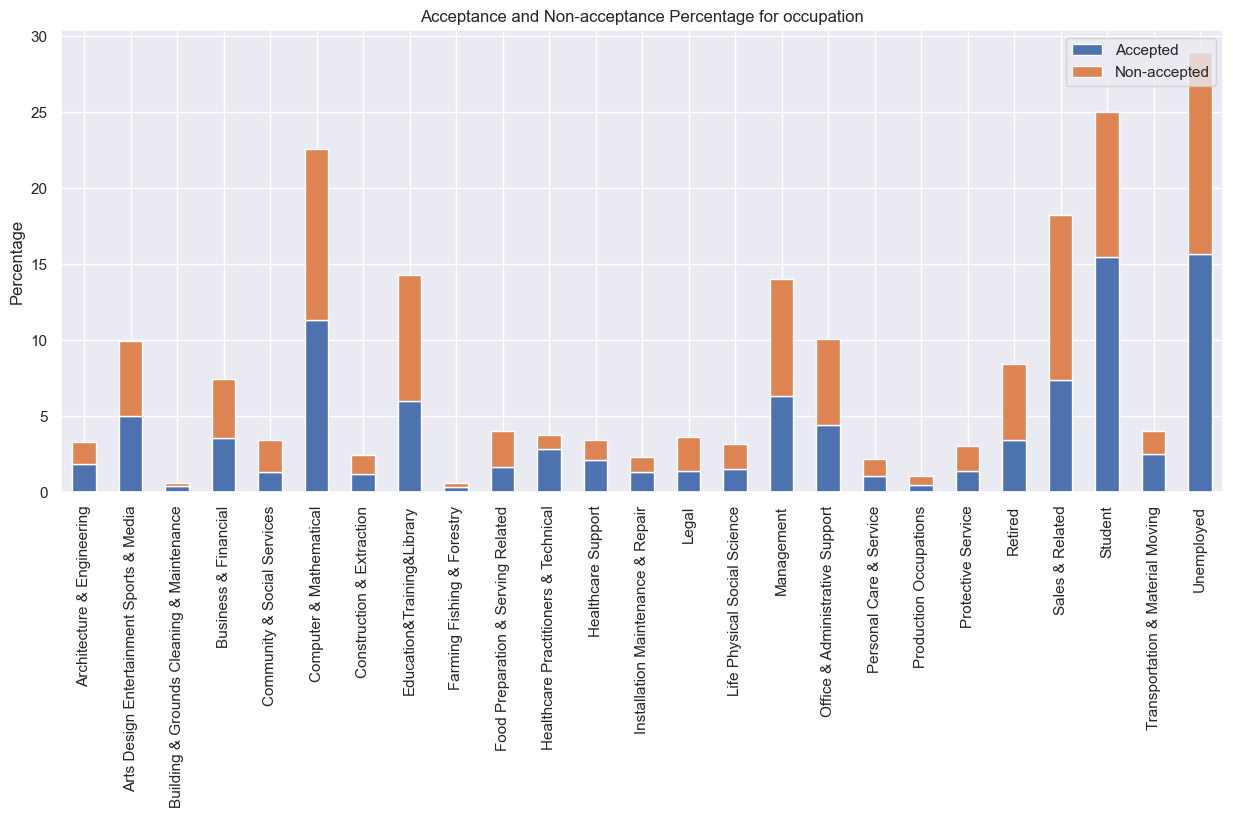

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

categorical_variables = ['destination', 'passanger', 'weather', 'time', 'gender', 'maritalStatus', 'has_children', 'education', 'occupation']

# Set the size of the plots
sns.set(rc={'figure.figsize': (12, 8)})

# Plot the distribution of each categorical variable in both DataFrames
for variable in categorical_variables:
    fig, ax = plt.subplots(figsize=(15, 6))

    # Get the union of unique values in both DataFrames for the current variable
    unique_values = pd.concat([accepted_coffee_house_df[variable], non_accepted_coffee_house_df[variable]]).unique()
    unique_values.sort()

    # Calculate the percentage of acceptance and non-acceptance for each category
    accepted_percent = accepted_coffee_house_df[variable].value_counts(normalize=True) * 100
    non_accepted_percent = non_accepted_coffee_house_df[variable].value_counts(normalize=True) * 100

    # Create a DataFrame with the percentages
    percent_df = pd.DataFrame({'Accepted': accepted_percent, 'Non-accepted': non_accepted_percent}).fillna(0)

    # Plot the percentage DataFrame as a stacked bar plot
    percent_df.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f"Acceptance and Non-acceptance Percentage for {variable}")
    ax.set_xticklabels(unique_values, rotation=90)
    ax.set_ylabel("Percentage")
    ax.legend(loc="upper right")

    plt.show()


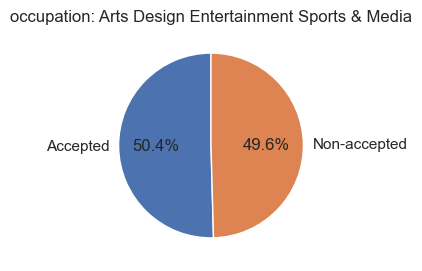

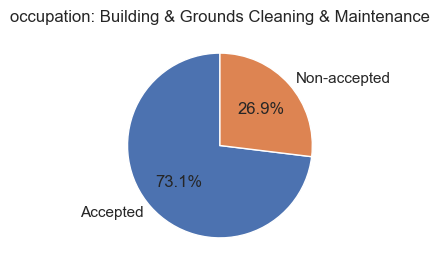

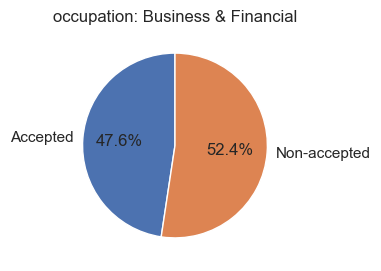

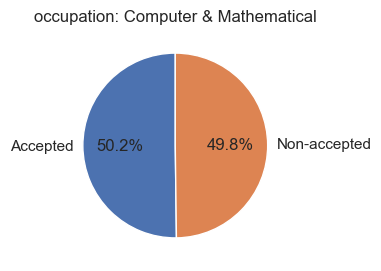

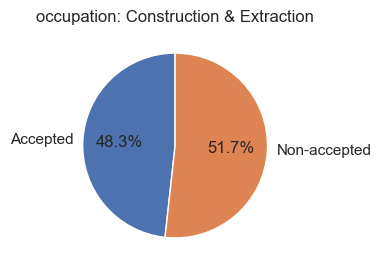

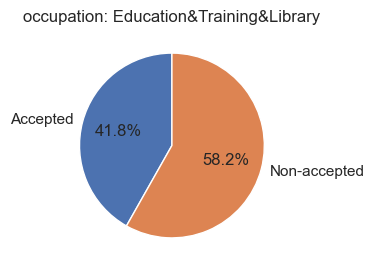

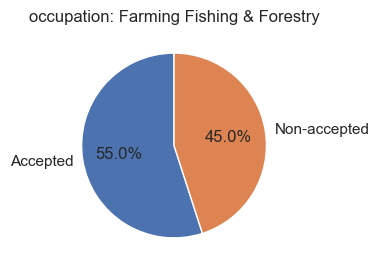

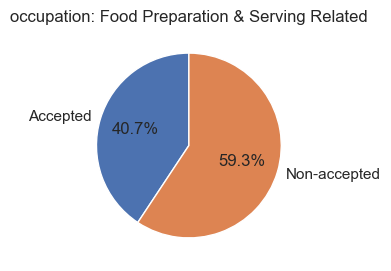

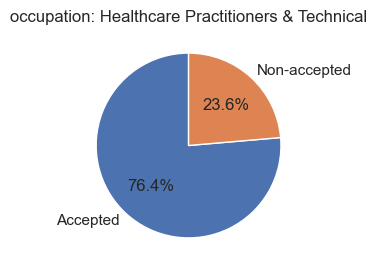

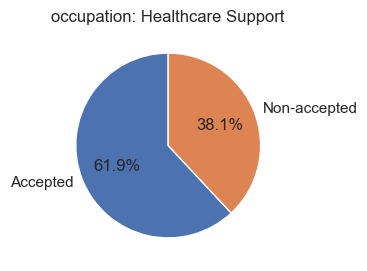

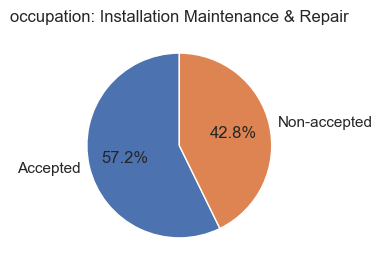

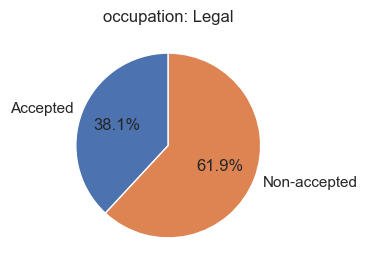

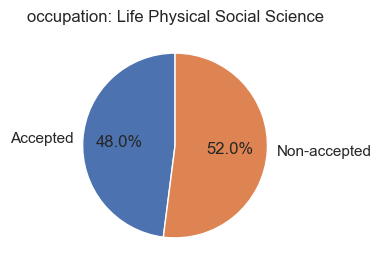

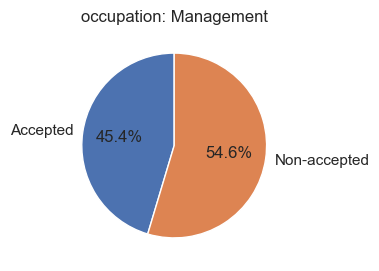

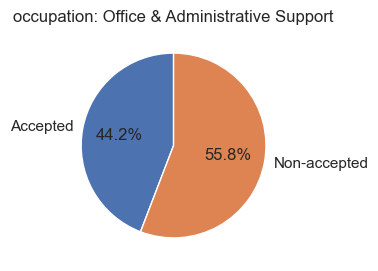

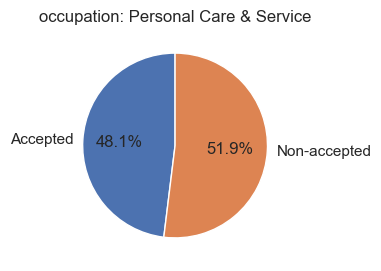

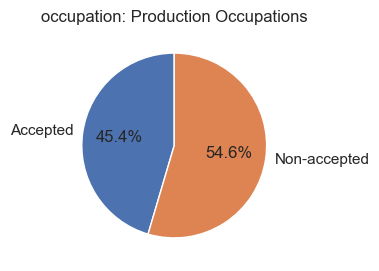

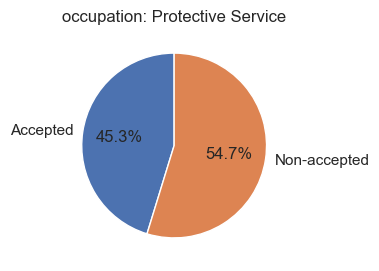

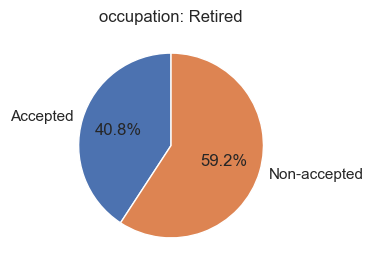

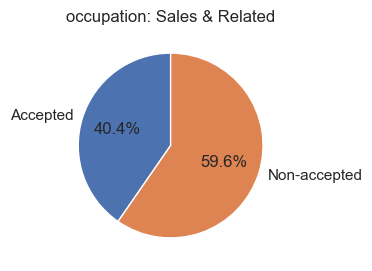

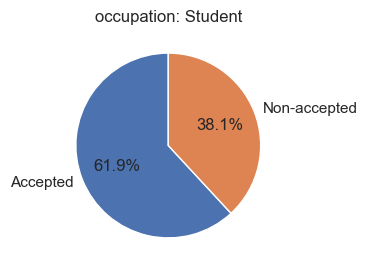

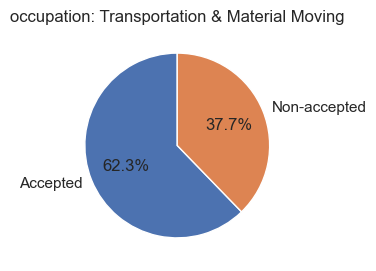

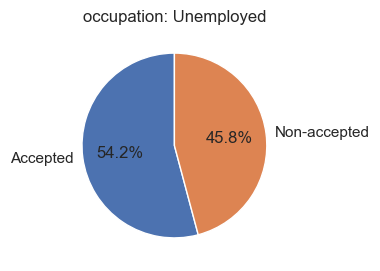

In [438]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

categorical_variables = ['destination', 'passanger', 'weather', 'time', 'gender', 'maritalStatus', 'has_children', 'education', 'occupation']

# Plot the distribution of each categorical variable in both DataFrames
for variable in categorical_variables:
    unique_values = pd.concat([accepted_coffee_house_df[variable], non_accepted_coffee_house_df[variable]]).unique()
    unique_values.sort()

    # Calculate the percentage of acceptance and non-acceptance for each category
    accepted_percent = accepted_coffee_house_df[variable].value_counts(normalize=True) * 100
    non_accepted_percent = non_accepted_coffee_house_df[variable].value_counts(normalize=True) * 100

    # Create a DataFrame with the percentages
    percent_df = pd.DataFrame({'Accepted': accepted_percent, 'Non-accepted': non_accepted_percent}).fillna(0)

for value in unique_values:
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.pie(percent_df.loc[value], labels=['Accepted', 'Non-accepted'], autopct='%.1f%%', startangle=90)
    ax.set_title(f"{variable}: {value}")
    plt.show()


In [439]:
from scipy.stats import pointbiserialr

# Create a dictionary to store the correlation coefficients
correlations = {}

# Encode the categorical variables as numeric values
encoded_coffee_house_df = coffee_house_df.copy()
for variable in categorical_variables:
    encoded_coffee_house_df[variable] = encoded_coffee_house_df[variable].astype('category').cat.codes

# Calculate the point-biserial correlation coefficients for each categorical variable
for variable in categorical_variables:
    corr, _ = pointbiserialr(encoded_coffee_house_df['Y'], encoded_coffee_house_df[variable])
    correlations[variable] = corr

# Print the correlations
print("Correlations between the target variable (Y) and categorical variables:")
for variable, corr in correlations.items():
    print(f"{variable}: {corr:.4f}")


Correlations between the target variable (Y) and categorical variables:
destination: 0.0536
passanger: 0.0999
weather: 0.0101
time: -0.1459
gender: 0.0110
maritalStatus: -0.0152
has_children: -0.0137
education: 0.0355
occupation: 0.0328


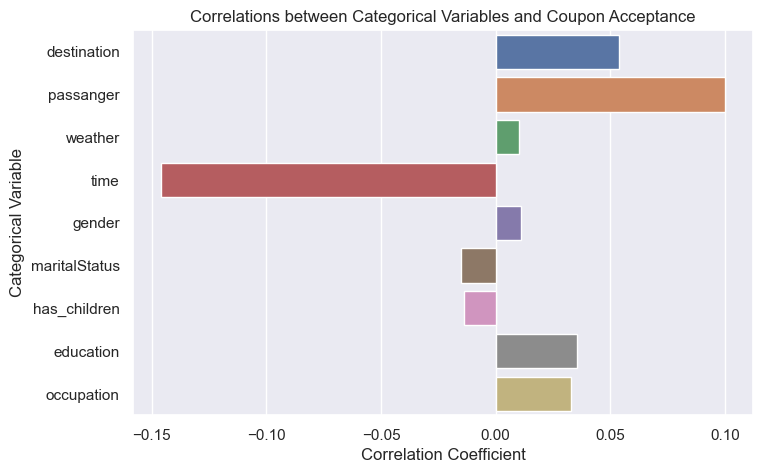

In [440]:
correlation_values = list(correlations.values())
correlation_variables = list(correlations.keys())

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=correlation_values, y=correlation_variables, ax=ax)
ax.set_xlabel("Correlation Coefficient")
ax.set_ylabel("Categorical Variable")
ax.set_title("Correlations between Categorical Variables and Coupon Acceptance")
plt.show()


- The result shows the correlation coefficients between the target variable (Y) and each categorical variable.

A positive correlation coefficient means that there is a positive association between the variable and the target variable. In this case, destination and passanger have positive correlation coefficients, which means that there is a higher chance of accepting the coupon when the destination is No Urgent Place or the passanger is Alone or with Friends.

A negative correlation coefficient means that there is a negative association between the variable and the target variable. In this case, time, gender, maritalStatus, and has_children have negative correlation coefficients, which means that there is a lower chance of accepting the coupon when the time is 10PM, the passenger is male, the driver is unmarried or divorced, or the driver has children.

A correlation coefficient close to 0 means that there is no significant correlation between the variable and the target variable. In this case, weather, education, and occupation have correlation coefficients close to 0.



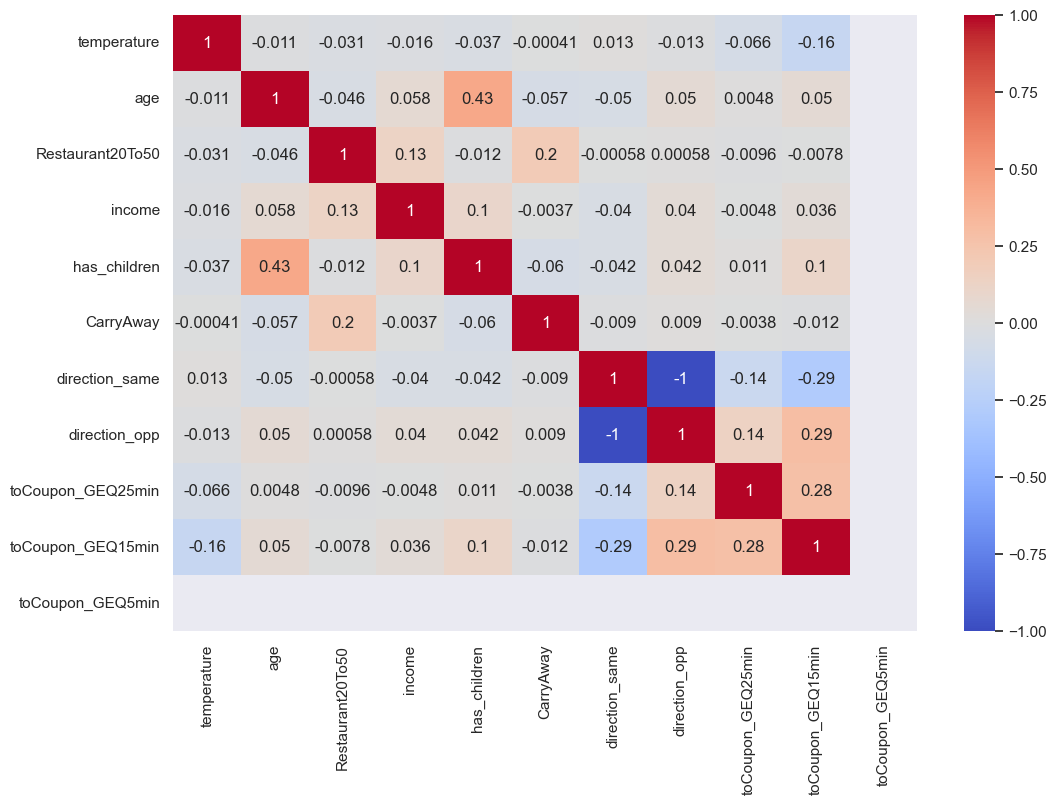

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical variables from the dataframe
numerical_variables = ['time', 'temperature', 'age', 'Restaurant20To50', 'income','has_children','CarryAway','direction_same','direction_opp','toCoupon_GEQ25min','toCoupon_GEQ15min','toCoupon_GEQ5min']

# Calculate the correlation matrix
corr_matrix = coffee_house_df[numerical_variables].corr()

# Create the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()


- To find the correlation between the target variable (Y) and the other features, you can use the corr() method:

In [442]:
correlations = coffee_house_df.corr()
correlations['Y']

temperature             0.070589
expiration              0.149905
age                    -0.069796
has_children           -0.013742
income                 -0.050921
Bar                     0.007781
CoffeeHouse             0.259181
CarryAway               0.026103
RestaurantLessThan20    0.037012
Restaurant20To50        0.073502
toCoupon_GEQ5min             NaN
toCoupon_GEQ15min      -0.093462
toCoupon_GEQ25min      -0.089377
direction_same          0.029042
direction_opp          -0.029042
Y                       1.000000
Name: Y, dtype: float64

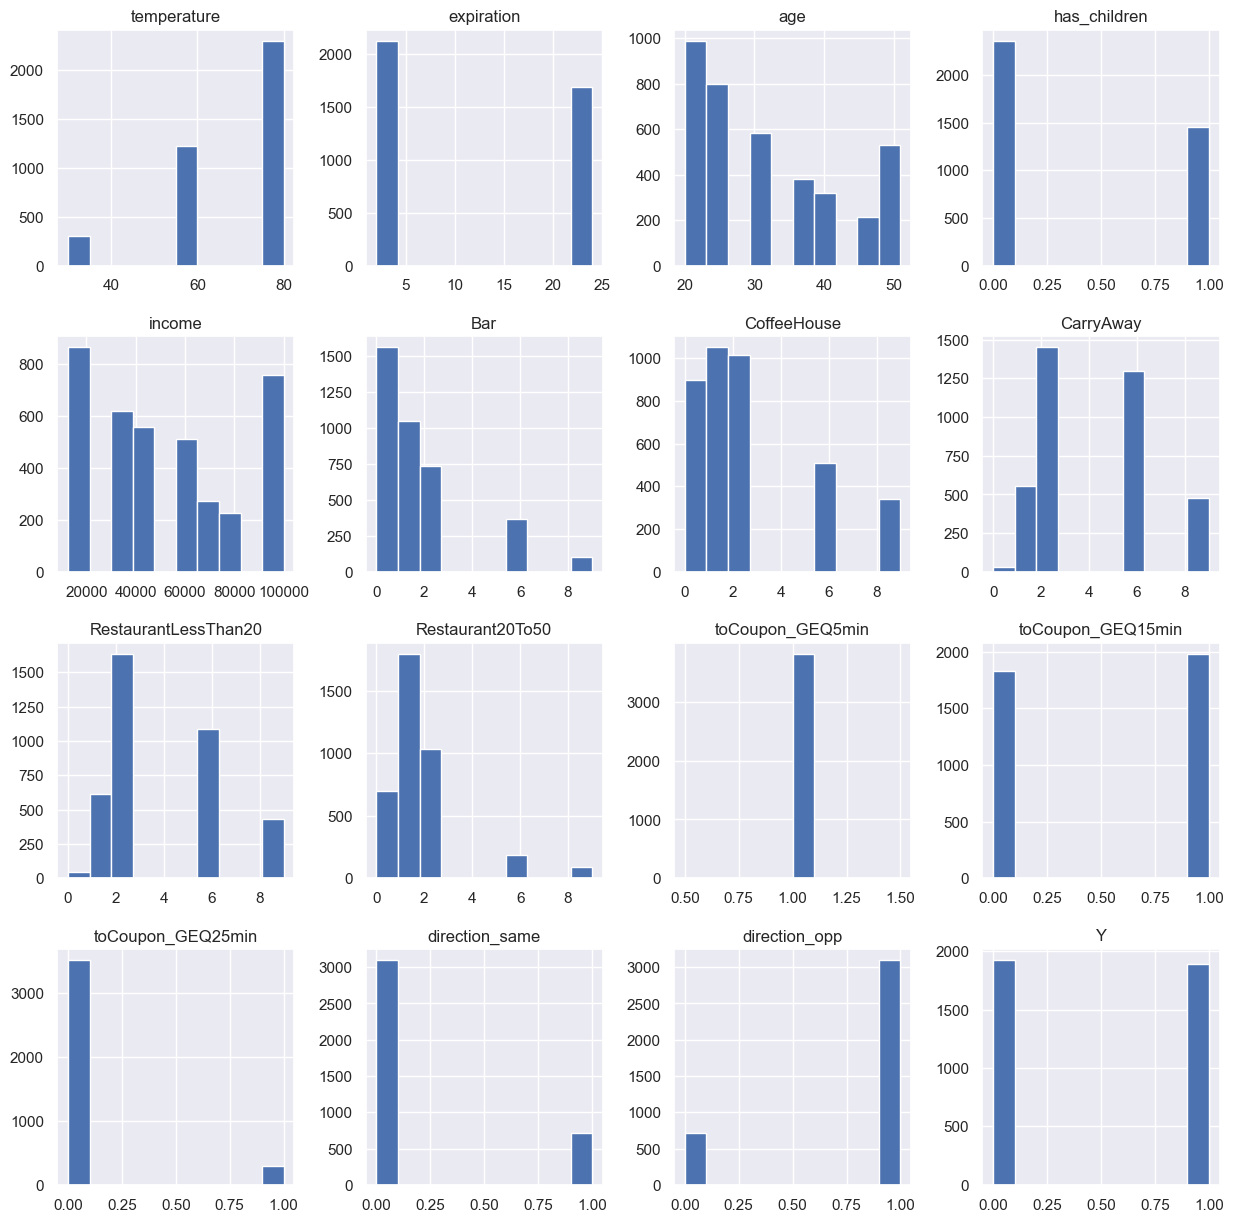

In [443]:
coffee_house_df.hist(figsize=(15, 15))
plt.show()

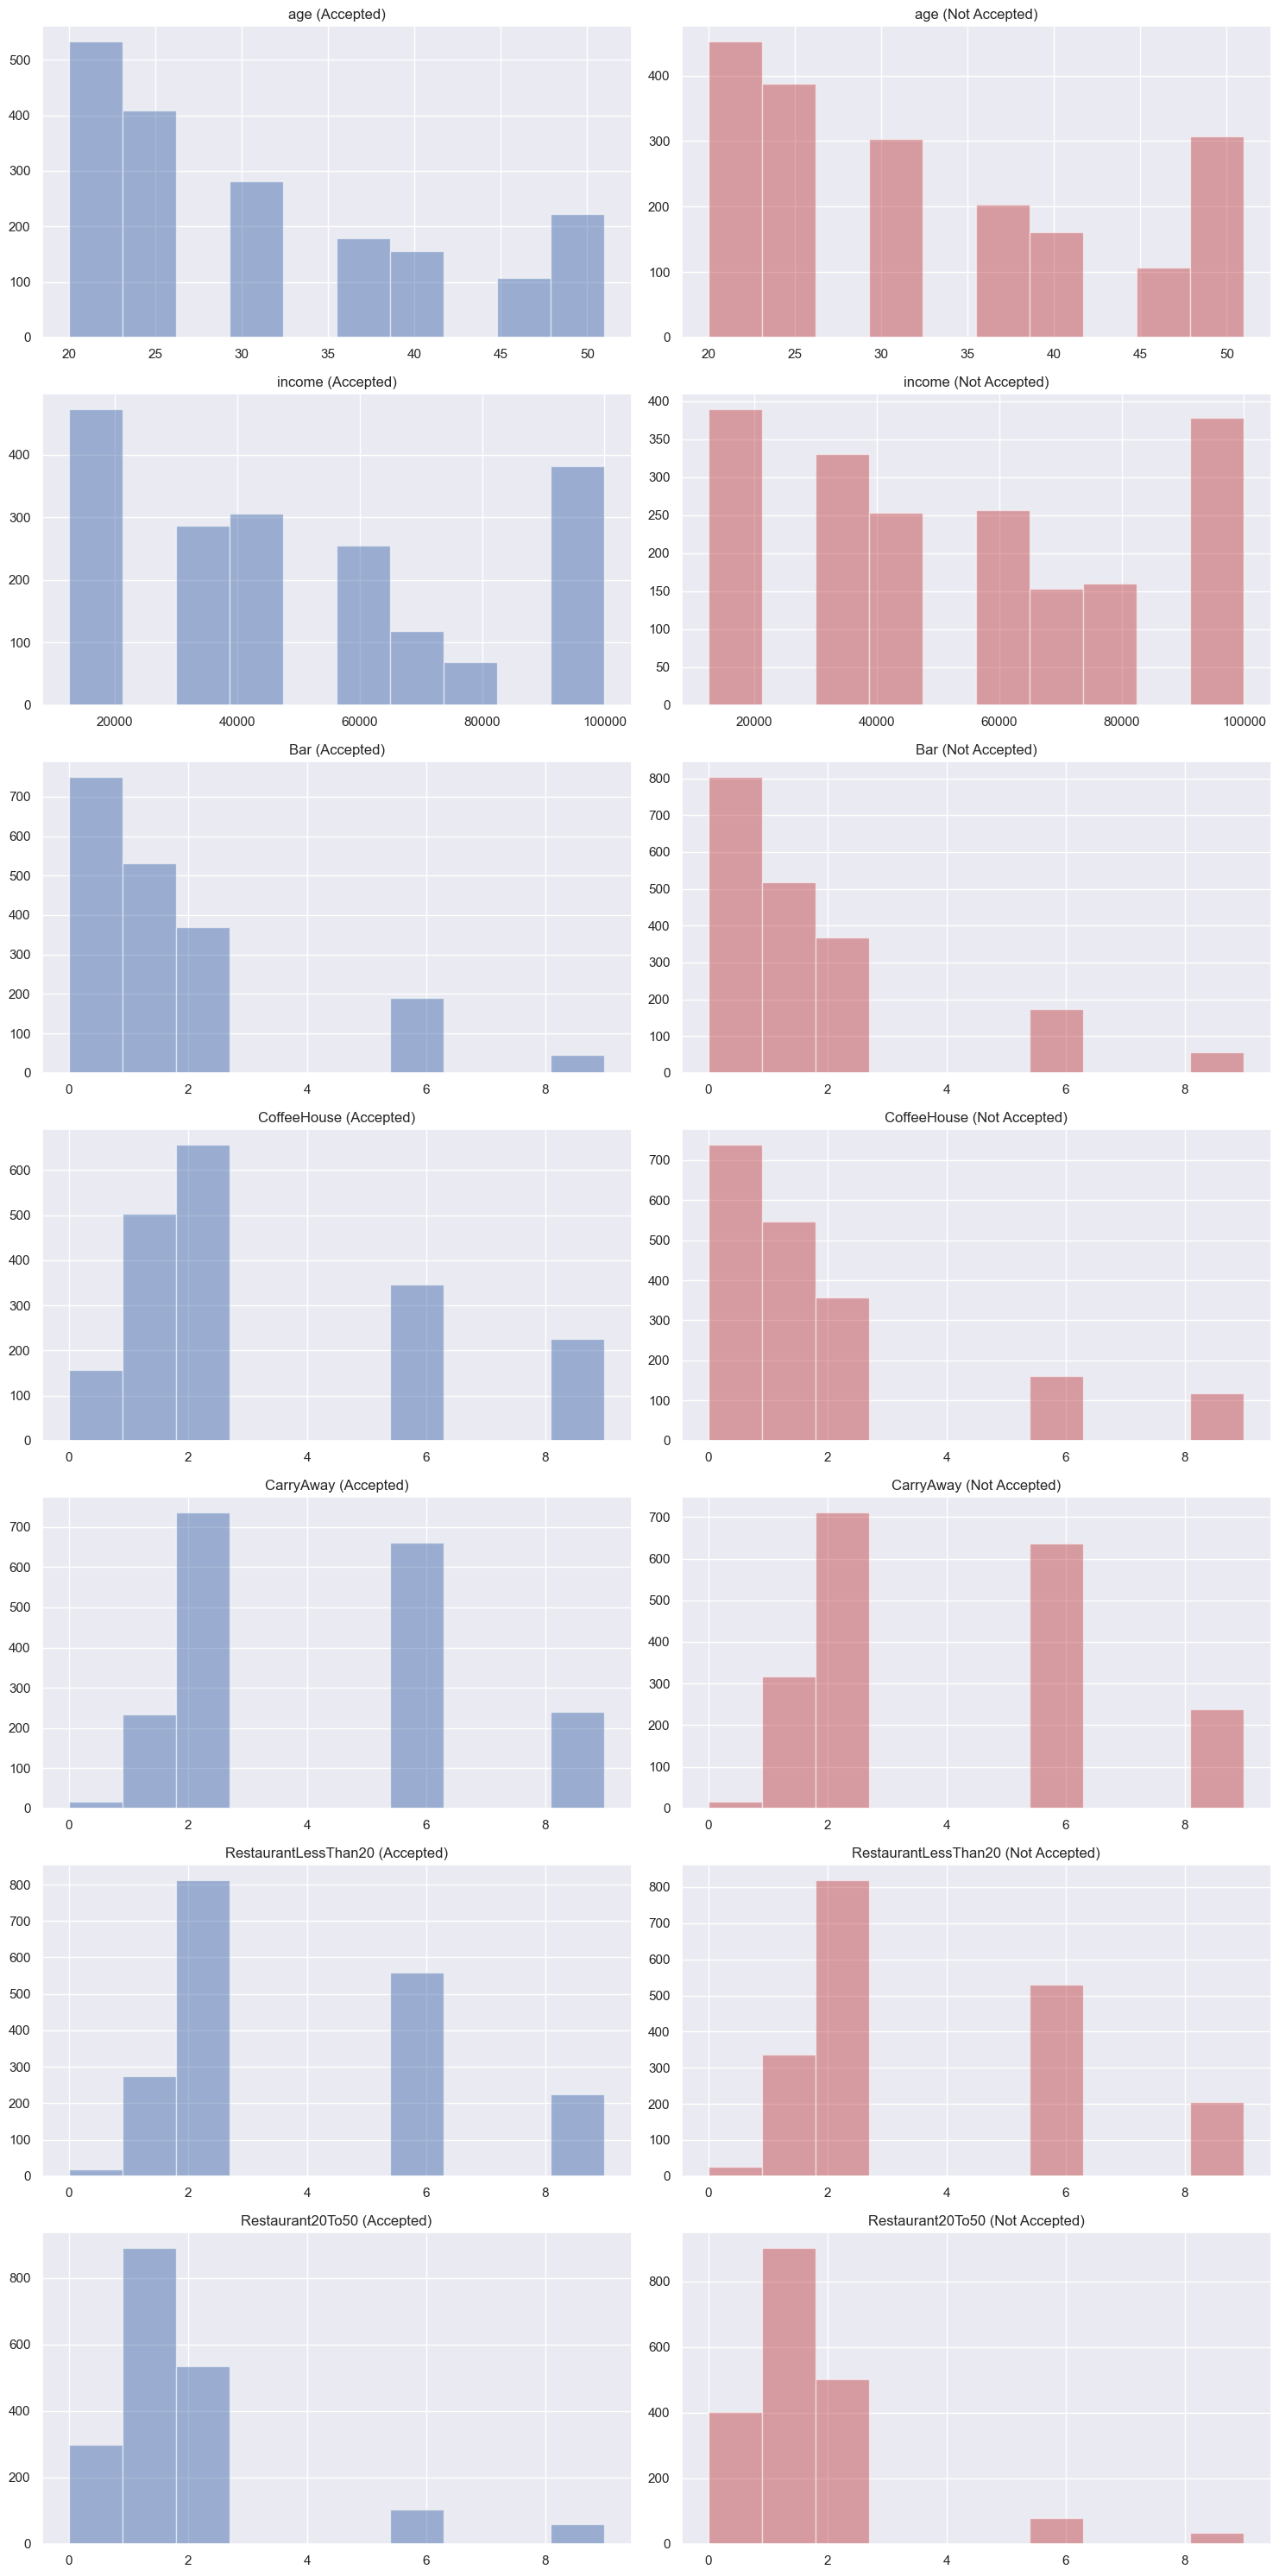

In [444]:
accepted_df = coffee_house_df[coffee_house_df['Y'] == 1]
not_accepted_df = coffee_house_df[coffee_house_df['Y'] == 0]

fig, axes = plt.subplots(len(continuous_columns), 2, figsize=(15, 30))

for idx, column in enumerate(continuous_columns):
    axes[idx][0].hist(accepted_df[column], alpha=0.5, label='Accepted')
    axes[idx][0].set_title(f'{column} (Accepted)')
    axes[idx][1].hist(not_accepted_df[column], alpha=0.5, label='Not Accepted', color='r')
    axes[idx][1].set_title(f'{column} (Not Accepted)')

plt.tight_layout()
plt.show()




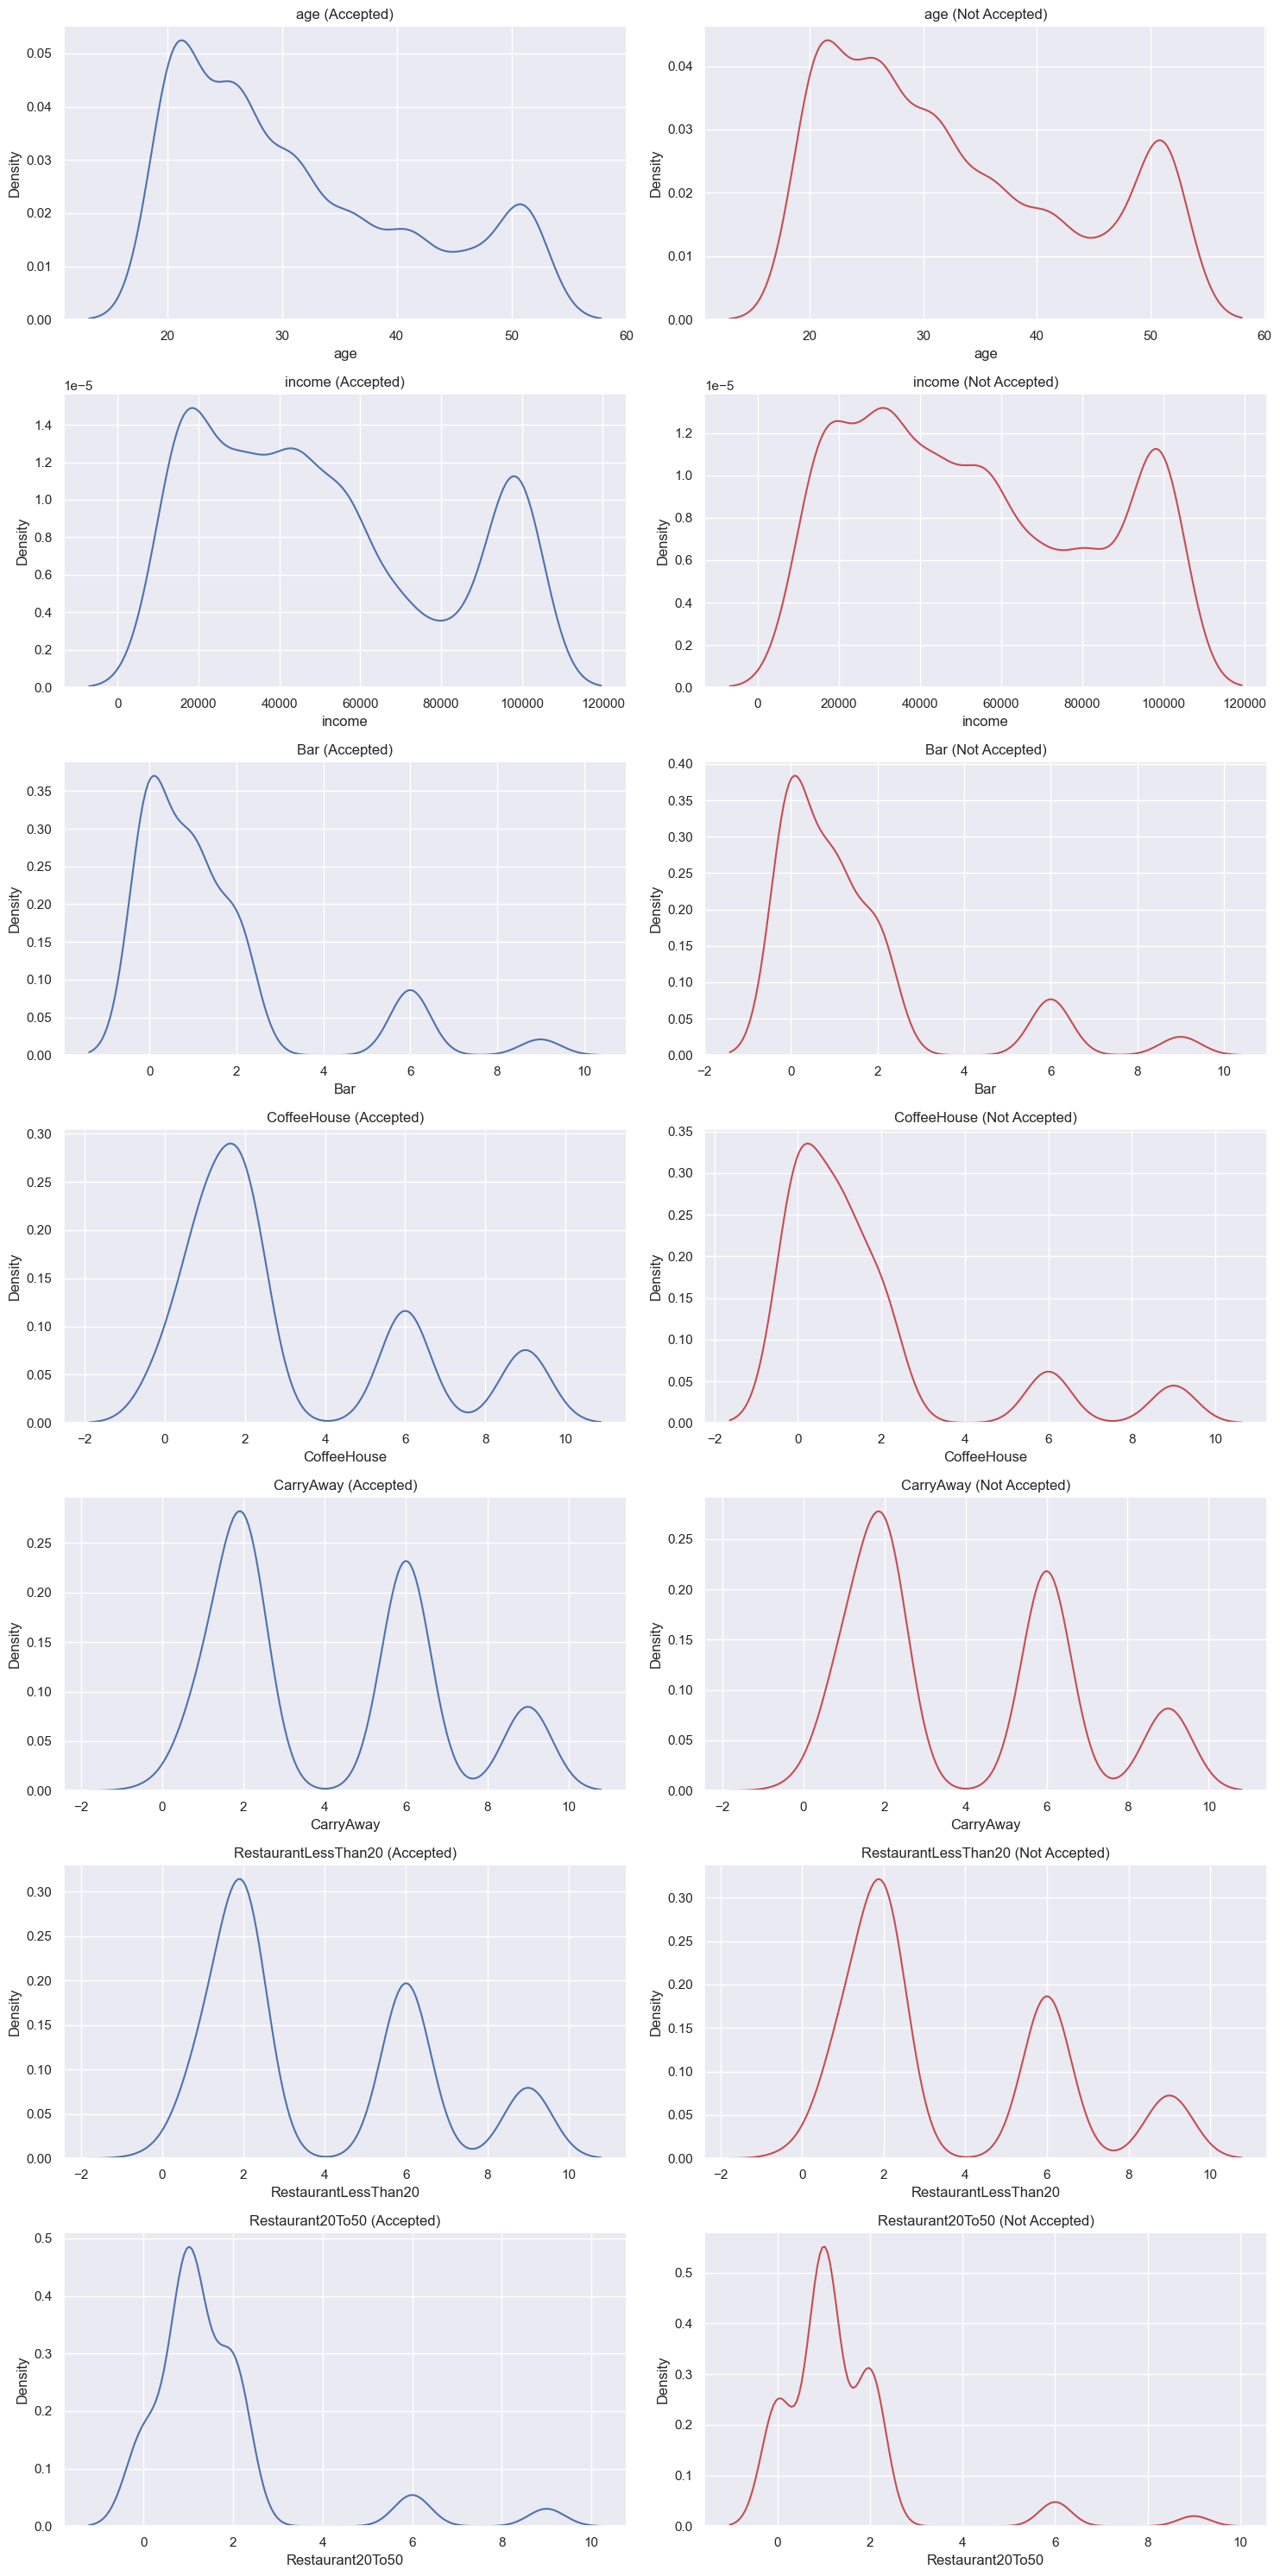

In [445]:
fig, axes = plt.subplots(len(continuous_columns), 2, figsize=(15, 30))

for idx, column in enumerate(continuous_columns):
    sns.kdeplot(data=accepted_df, x=column, ax=axes[idx][0])
    axes[idx][0].set_title(f'{column} (Accepted)')
    sns.kdeplot(data=not_accepted_df, x=column, ax=axes[idx][1], color='r')
    axes[idx][1].set_title(f'{column} (Not Accepted)')

plt.tight_layout()
plt.show()


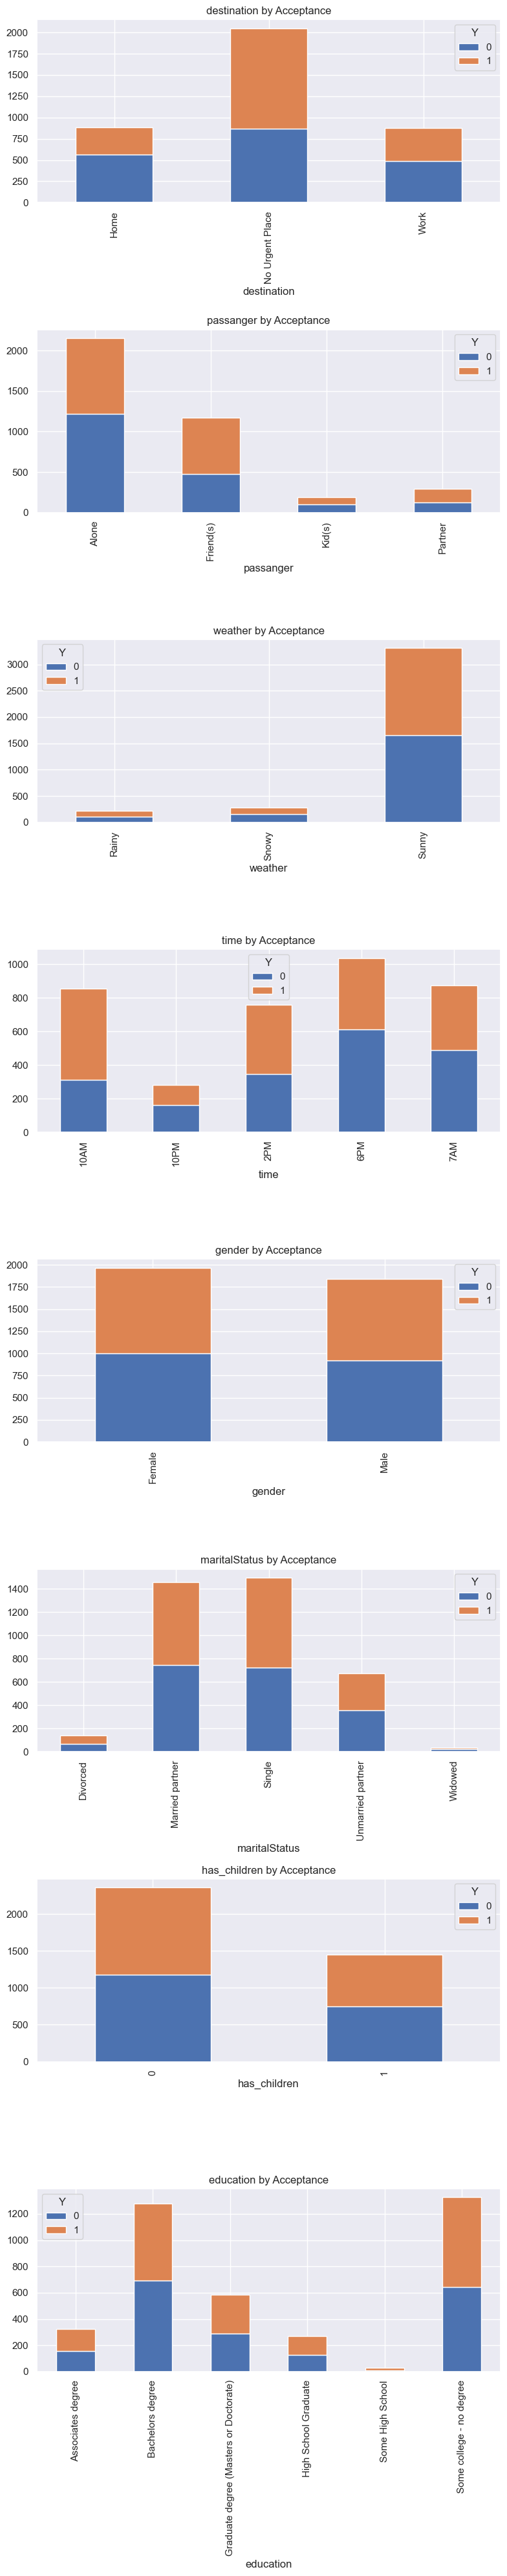

In [446]:
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(8, 40))

for idx, column in enumerate(categorical_columns):
    pd.crosstab(coffee_house_df[column], coffee_house_df['Y']).plot(kind='bar', stacked=True, ax=axes[idx])
    axes[idx].set_title(f'{column} by Acceptance')

plt.tight_layout()
plt.show()



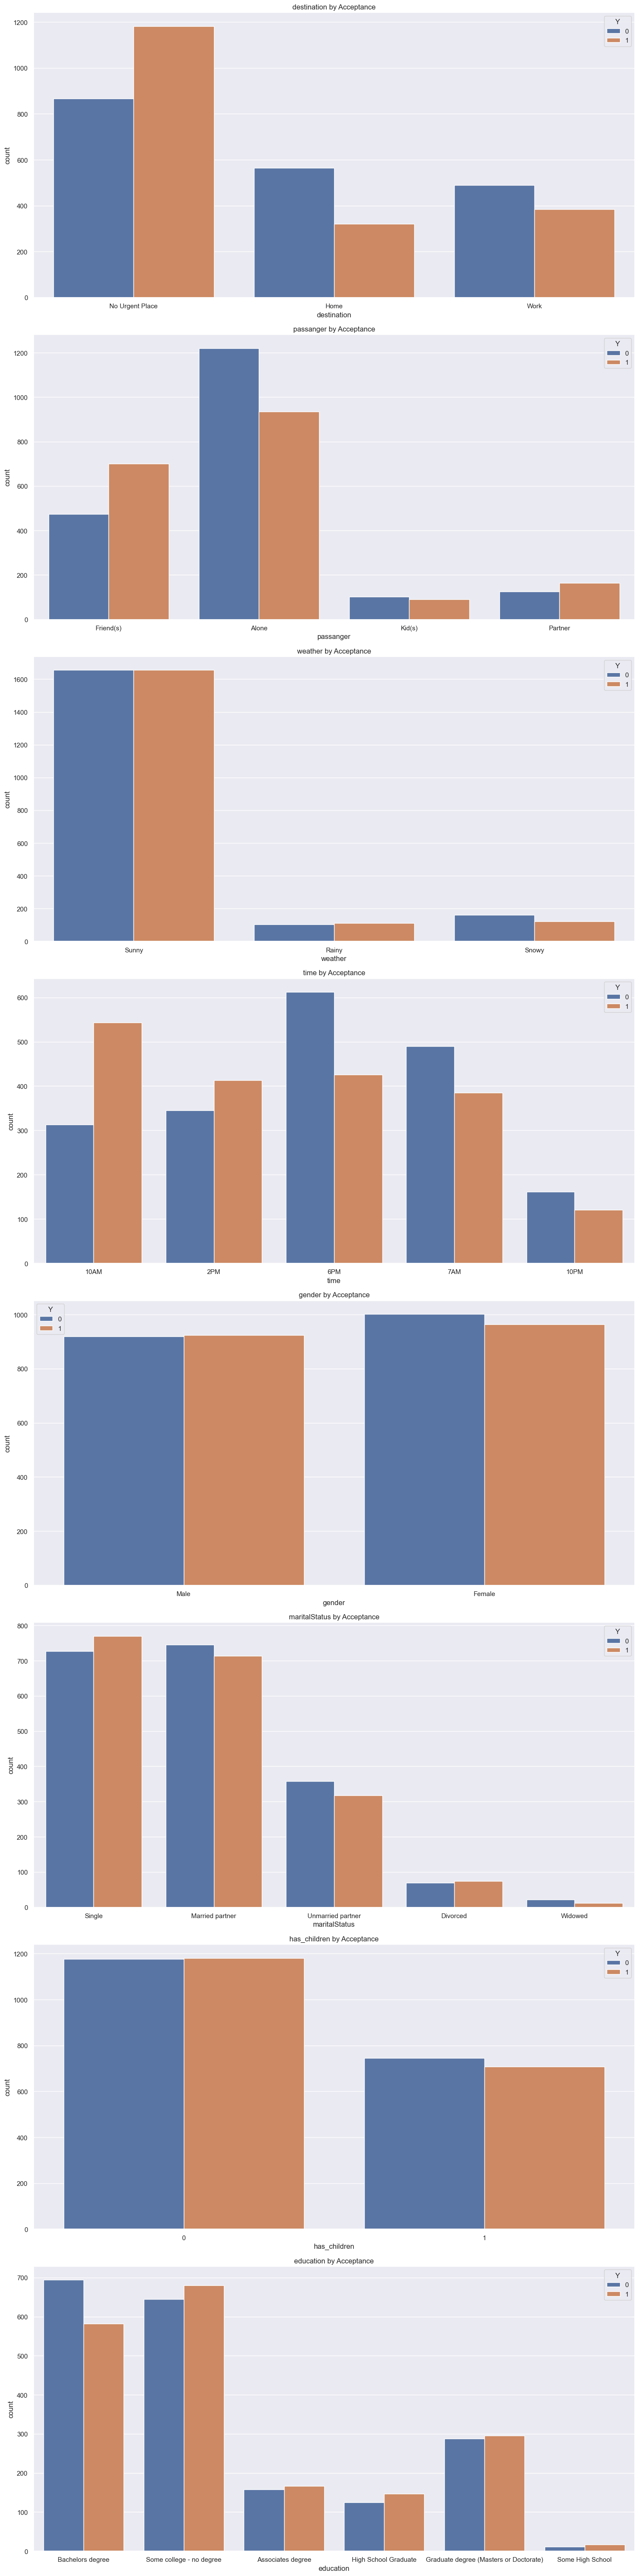

In [447]:
import seaborn as sns

categorical_columns = ['destination', 'passanger', 'weather', 'time', 'gender', 'maritalStatus', 'has_children', 'education']

fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(15, 60))

for idx, column in enumerate(categorical_columns):
    sns.countplot(data=coffee_house_df, x=column, hue='Y', ax=axes[idx])
    axes[idx].set_title(f'{column} by Acceptance')

plt.tight_layout()
plt.show()


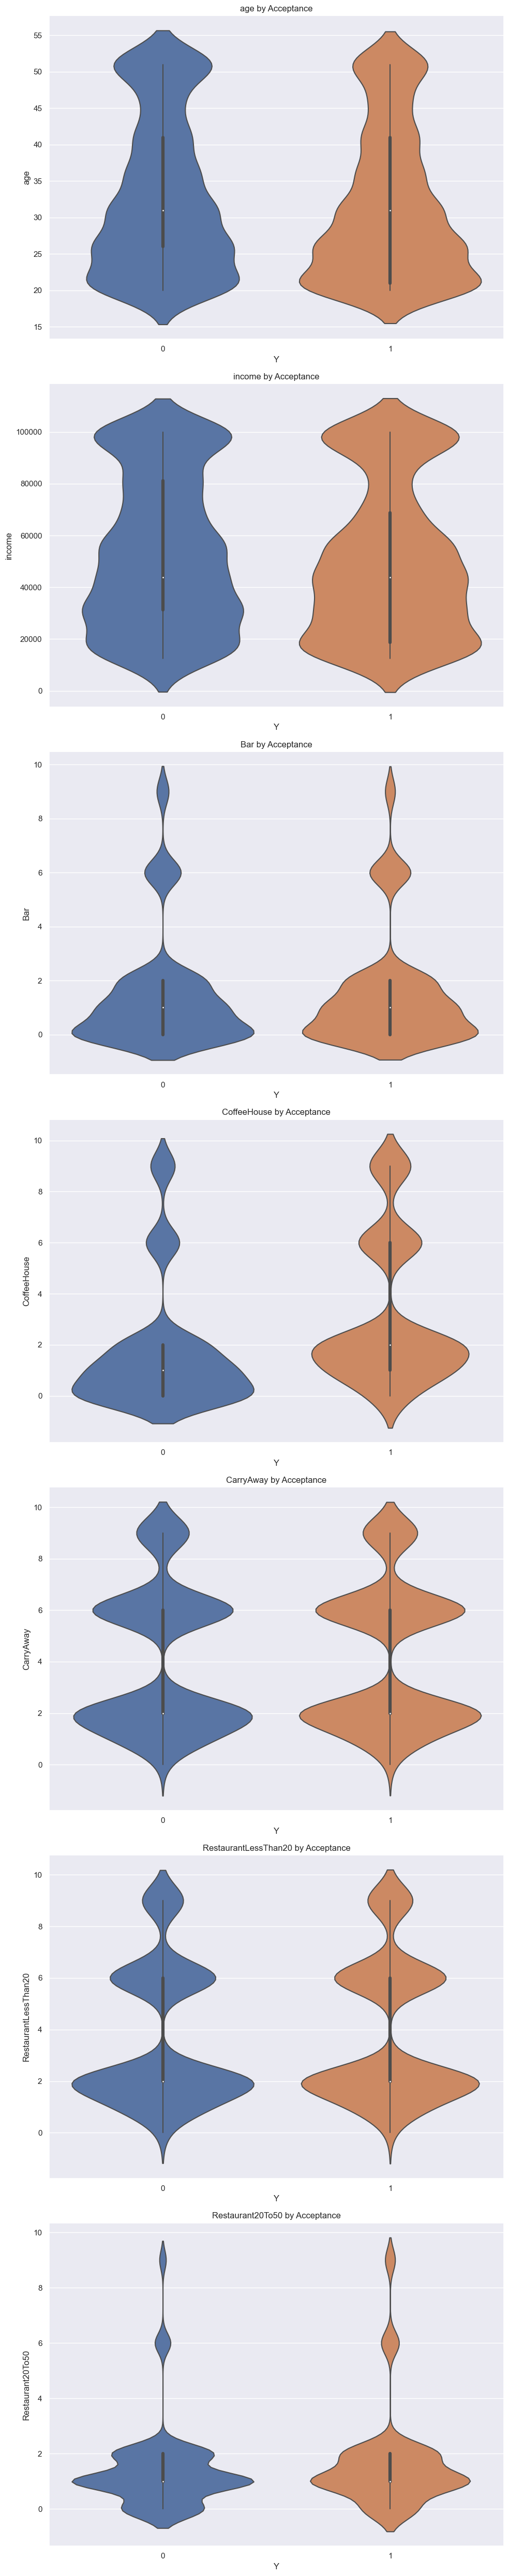

In [448]:
continuous_columns = ['age', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

fig, axes = plt.subplots(len(continuous_columns), 1, figsize=(10, 50))

for idx, column in enumerate(continuous_columns):
    sns.violinplot(data=coffee_house_df, x='Y', y=column, ax=axes[idx])
    axes[idx].set_title(f'{column} by Acceptance')

plt.tight_layout()
plt.show()


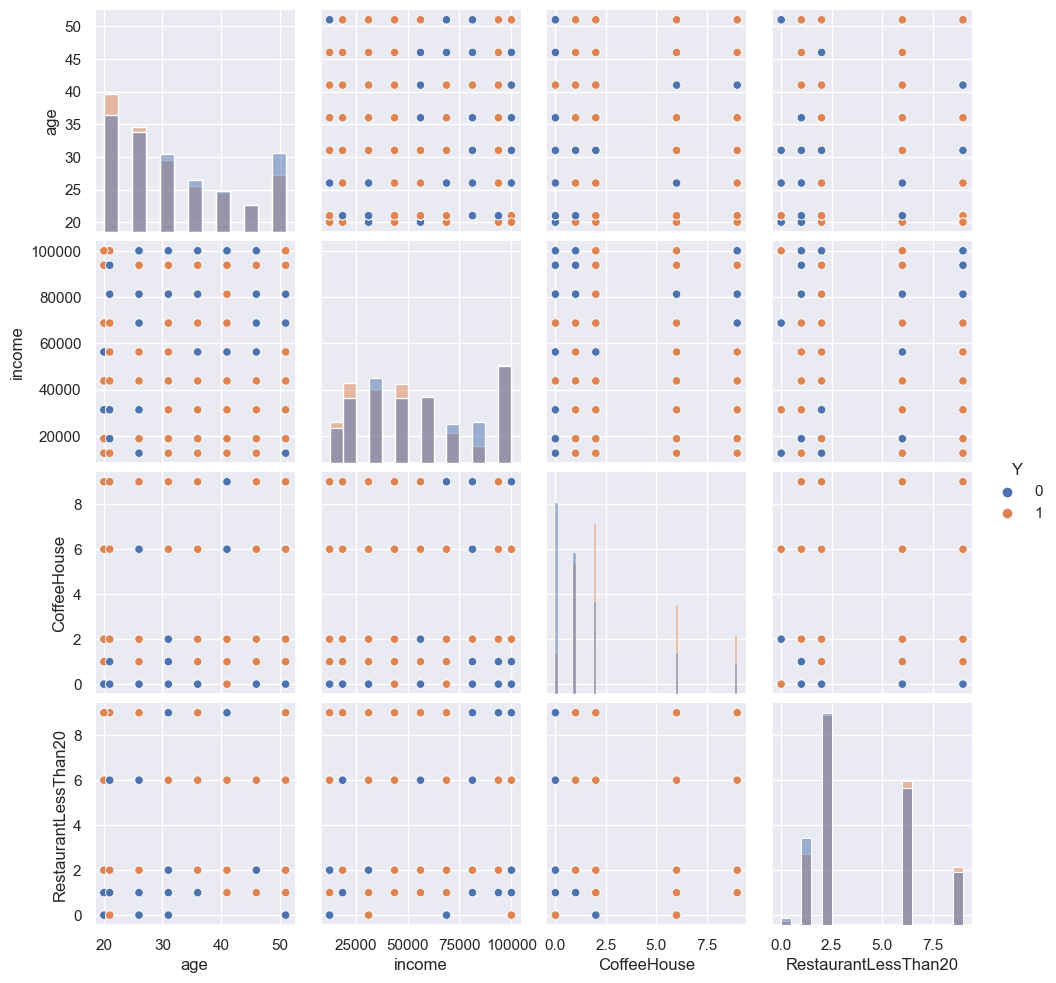

In [449]:
subset_columns = ['age', 'income', 'CoffeeHouse', 'RestaurantLessThan20', 'Y']
sns.pairplot(coffee_house_df[subset_columns], hue='Y', diag_kind='hist')
plt.show()


In [450]:
destination_acceptance_rate = coffee_house_df.groupby('destination')['Y'].mean() * 100
print(destination_acceptance_rate)

destination
Home               36.230248
No Urgent Place    57.714844
Work               44.000000
Name: Y, dtype: float64


- Here is the code to create various visualizations using the coffee_house_df DataFrame for the 'destination' column:

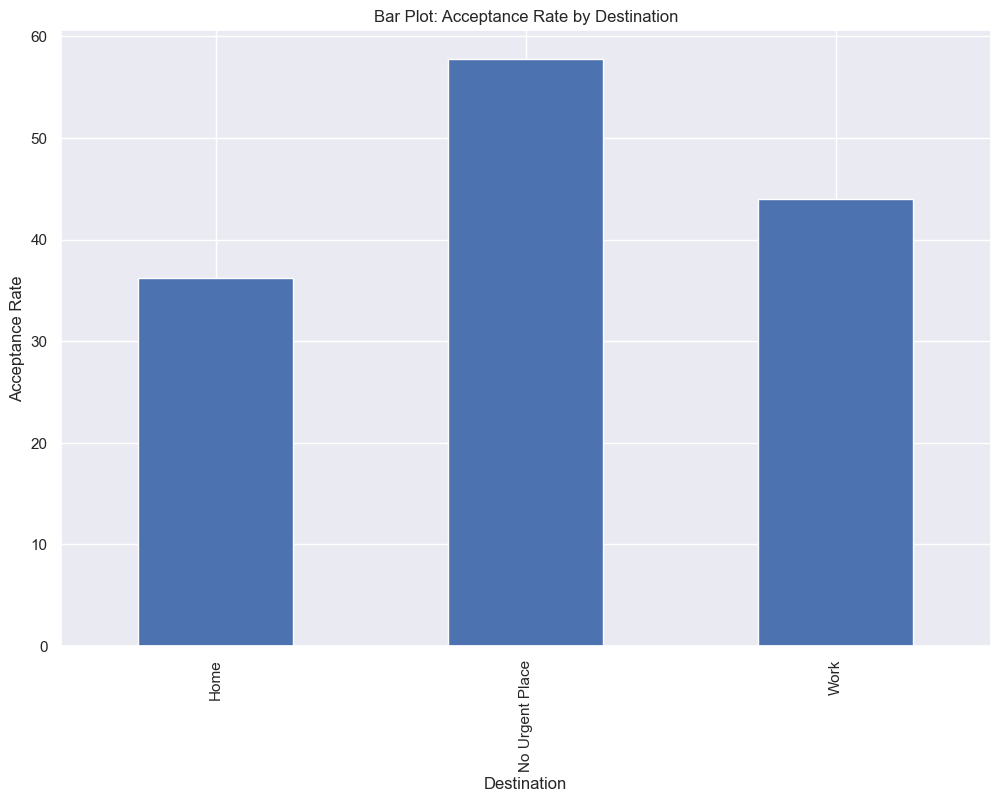

In [451]:
destination_acceptance_rate.plot(kind='bar')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.title('Bar Plot: Acceptance Rate by Destination')
plt.show()


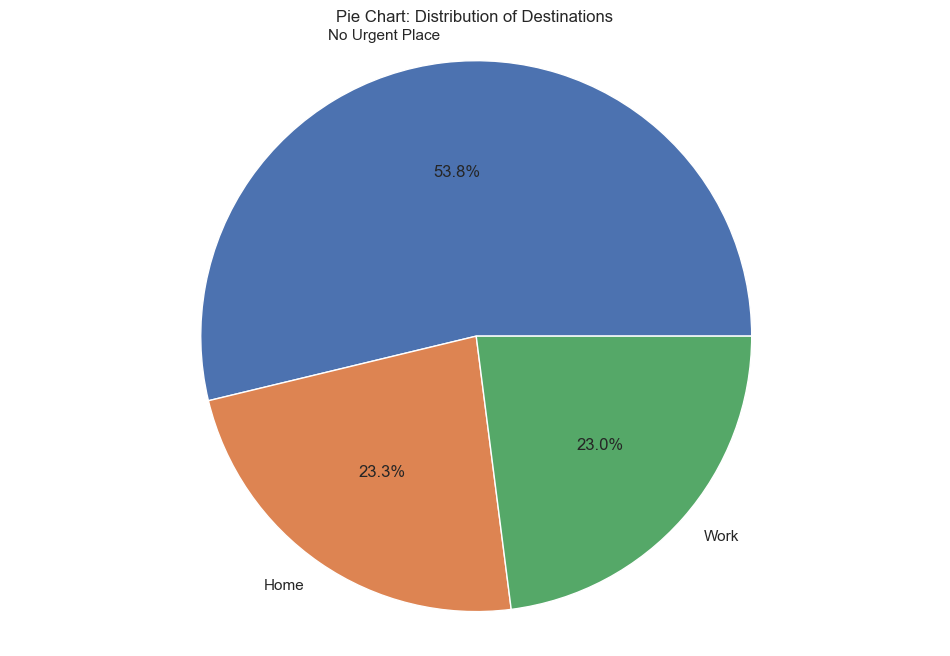

In [452]:
destination_counts = coffee_house_df['destination'].value_counts()
plt.pie(destination_counts, labels=destination_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart: Distribution of Destinations')
plt.show()


- Next, filter the DataFrame to get drivers who go to a coffee house more than once a month and are over the age of 25:

In [453]:
coffee_house_df = data[data['coupon'] == 'Coffee House']

coffee_over_25_more_than_once = coffee_house_df[(coffee_house_df['CoffeeHouse'] >= 2) & (coffee_house_df['age'] > 25)]

other_drivers = coffee_house_df[~((coffee_house_df['CoffeeHouse'] >= 2) & (coffee_house_df['age'] > 25))]

acceptance_rate_coffee_over_25_more_than_once = coffee_over_25_more_than_once['Y'].mean() * 100
acceptance_rate_other_drivers = other_drivers['Y'].mean() * 100

print(f"Acceptance rate for drivers who go to a coffee house more than once a month and are over the age of 25: {acceptance_rate_coffee_over_25_more_than_once:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_drivers:.2f}%")


Acceptance rate for drivers who go to a coffee house more than once a month and are over the age of 25: 63.92%
Acceptance rate for all other drivers: 41.81%


- The results show that there is a significant difference in the acceptance rates between the two groups of drivers. Drivers who go to a coffee house more than once a month and are over the age of 25 have a higher acceptance rate (63.92%) compared to all other drivers (41.81%).

This indicates that drivers who visit coffee houses more frequently and are older are more likely to accept coffee house coupons. It could be that these drivers have a stronger preference for coffee or have more established coffee drinking habits, making them more receptive to coffee house promotions.

## Analyze the acceptance rate based on the frequency of going to a coffee house

- To analyze the acceptance rate based on the frequency of going to a coffee house, we'll calculate the acceptance rate for each frequency category.

Never (0)
Less than once a month (1)
1-3 times a month (2)
4-8 times a month (6)
More than 8 times a month (9)

In [454]:
coffee_house_categories = [0, 1, 2, 6, 9]
acceptance_rates = []

for category in coffee_house_categories:
    coffee_house_group = data[data['CoffeeHouse'] == category]
    total_coupons = len(coffee_house_group)
    accepted_coupons = len(coffee_house_group[coffee_house_group['Y'] == 1])
    acceptance_rate = (accepted_coupons / total_coupons) * 100
    acceptance_rates.append(acceptance_rate)

for category, rate in zip(coffee_house_categories, acceptance_rates):
    print(f"Acceptance rate for CoffeeHouse category {category}: {rate:.2f}%")






Acceptance rate for CoffeeHouse category 0: 45.28%
Acceptance rate for CoffeeHouse category 1: 55.31%
Acceptance rate for CoffeeHouse category 2: 65.11%
Acceptance rate for CoffeeHouse category 6: 63.02%
Acceptance rate for CoffeeHouse category 9: 58.36%


- Based on the acceptance rates for each CoffeeHouse category, we can observe the following trends:

The acceptance rate is relatively low (45.28%) for people who never go to a coffee house (category 0).
The acceptance rate increases to 55.31% for those who go to a coffee house less than once a month (category 1).
The highest acceptance rate (65.11%) is observed among people who go to a coffee house 1-3 times a month (category 2).
The acceptance rate is slightly lower (63.02%) for people who visit a coffee house 4-8 times a month (category 6).
Finally, the acceptance rate drops to 58.36% for those who frequent coffee houses more than 8 times a month (category 9).
- This analysis suggests that people who visit coffee houses occasionally (1-3 times a month) are more likely to accept the coffee house coupons. However, the acceptance rate decreases as the frequency of coffee house visits increases beyond that range.

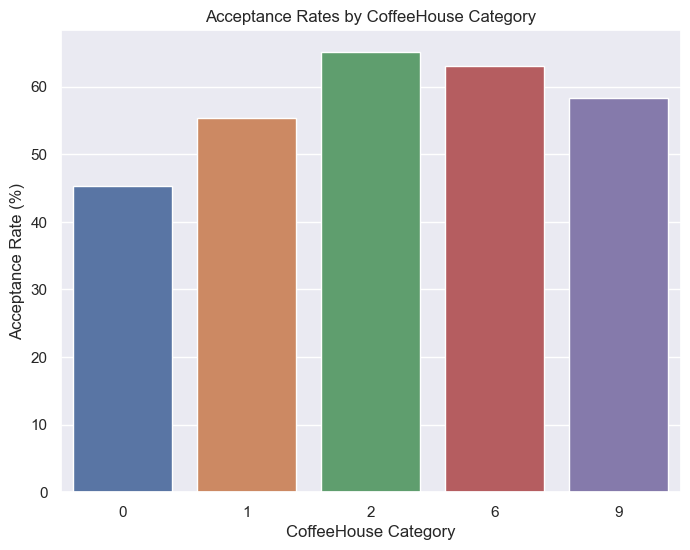

In [455]:

# Create a DataFrame containing CoffeeHouse categories and acceptance rates
coffee_house_data = pd.DataFrame({
    "CoffeeHouse": coffee_house_categories,
    "AcceptanceRate": acceptance_rates
})

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x="CoffeeHouse", y="AcceptanceRate", data=coffee_house_data)
plt.xlabel("CoffeeHouse Category")
plt.ylabel("Acceptance Rate (%)")
plt.title("Acceptance Rates by CoffeeHouse Category")
plt.show()

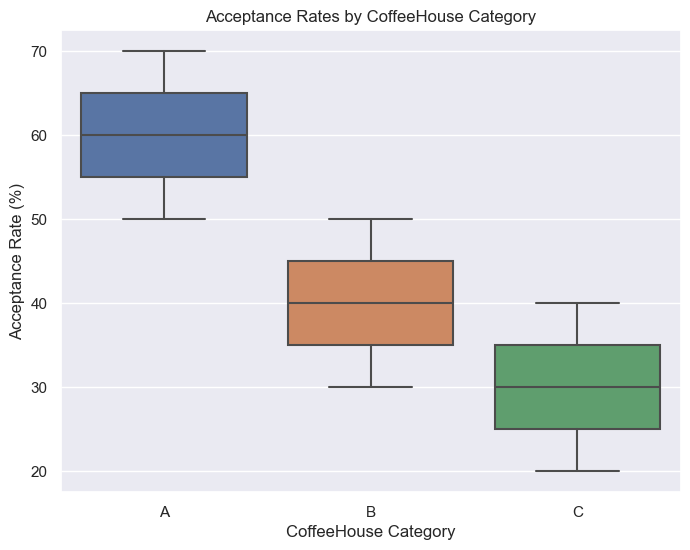

In [456]:
data = {
    "CoffeeHouse": ["A", "A", "A", "B", "B", "B", "C", "C", "C"],
    "AcceptanceRate": [50, 60, 70, 30, 40, 50, 20, 30, 40]
}

# Create a DataFrame containing CoffeeHouse categories and acceptance rates
coffee_house_data = pd.DataFrame(data)

# Create the box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="CoffeeHouse", y="AcceptanceRate", data=coffee_house_data)
plt.xlabel("CoffeeHouse Category")
plt.ylabel("Acceptance Rate (%)")
plt.title("Acceptance Rates by CoffeeHouse Category")
plt.show()

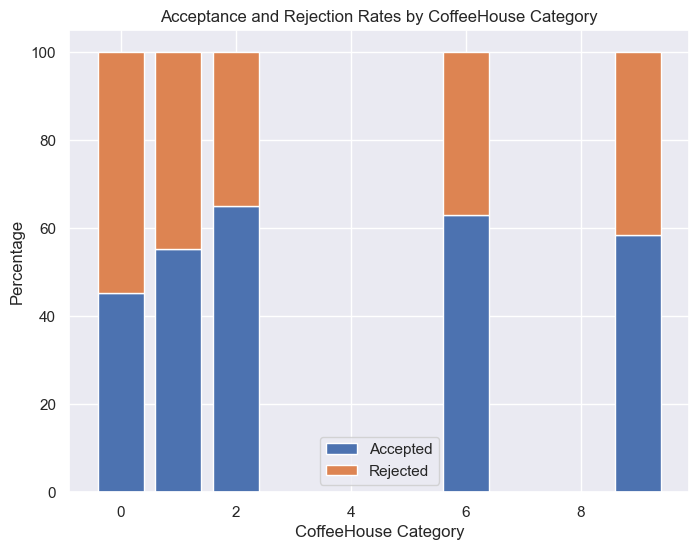

In [457]:
import matplotlib.pyplot as plt

# Calculate the rejection rates for each CoffeeHouse category
rejection_rates = [100 - rate for rate in acceptance_rates]

# Create a DataFrame containing CoffeeHouse categories, acceptance rates, and rejection rates
coffee_house_data = pd.DataFrame({
    "CoffeeHouse": coffee_house_categories,
    "AcceptanceRate": acceptance_rates,
    "RejectionRate": rejection_rates
})

# Create the stacked bar plot
plt.figure(figsize=(8, 6))
plt.bar(coffee_house_data["CoffeeHouse"], coffee_house_data["AcceptanceRate"], label="Accepted")
plt.bar(coffee_house_data["CoffeeHouse"], coffee_house_data["RejectionRate"], bottom=coffee_house_data["AcceptanceRate"], label="Rejected")

plt.xlabel("CoffeeHouse Category")
plt.ylabel("Percentage")
plt.title("Acceptance and Rejection Rates by CoffeeHouse Category")
plt.legend()
plt.show()


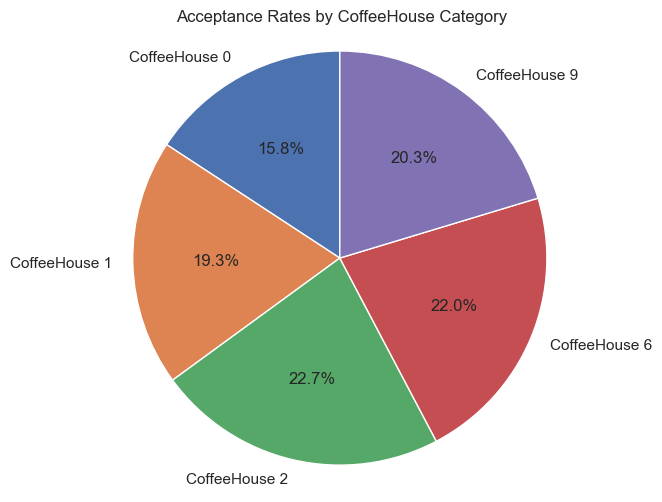

In [458]:
import matplotlib.pyplot as plt

# Set up labels for the pie chart
labels = [f"CoffeeHouse {category}" for category in coffee_house_categories]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(acceptance_rates, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.axis('equal')

plt.title("Acceptance Rates by CoffeeHouse Category")
plt.show()


- Based on the acceptance rates for different passenger categories, we can conclude that:

Drivers with friends as passengers have the highest acceptance rate for coffee coupons at 67.60%.
Drivers with their partner as a passenger have the second-highest acceptance rate at 59.33%.
Drivers who are alone have a slightly higher acceptance rate than those with kids as passengers, with acceptance rates of 52.56% and 49.62%, respectively.
- From these observations, it can be inferred that drivers are more likely to accept coffee coupons when they are with friends or their partner. The presence of kids as passengers or being alone leads to a lower acceptance rate.

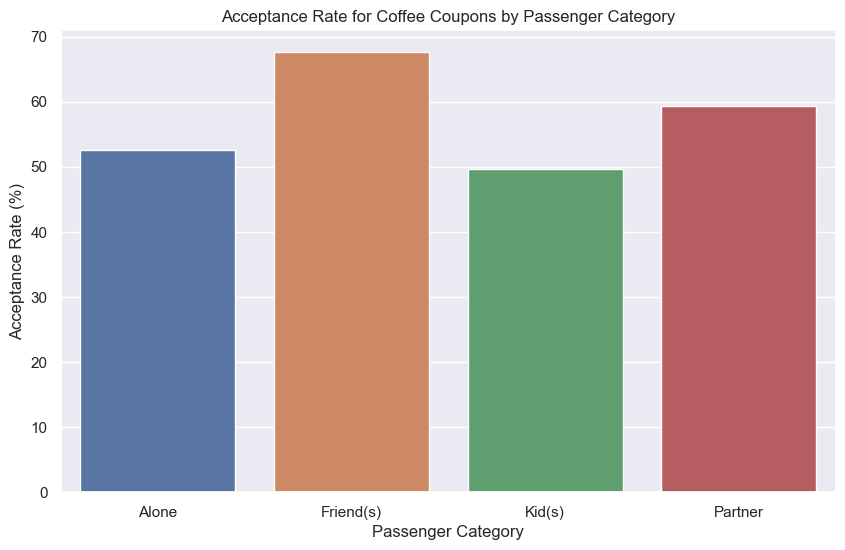

In [459]:
passenger_categories = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
acceptance_rates = [52.56, 67.60, 49.62, 59.33]

plt.figure(figsize=(10, 6))
sns.barplot(x=passenger_categories, y=acceptance_rates)
plt.xlabel('Passenger Category')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate for Coffee Coupons by Passenger Category')
plt.show()

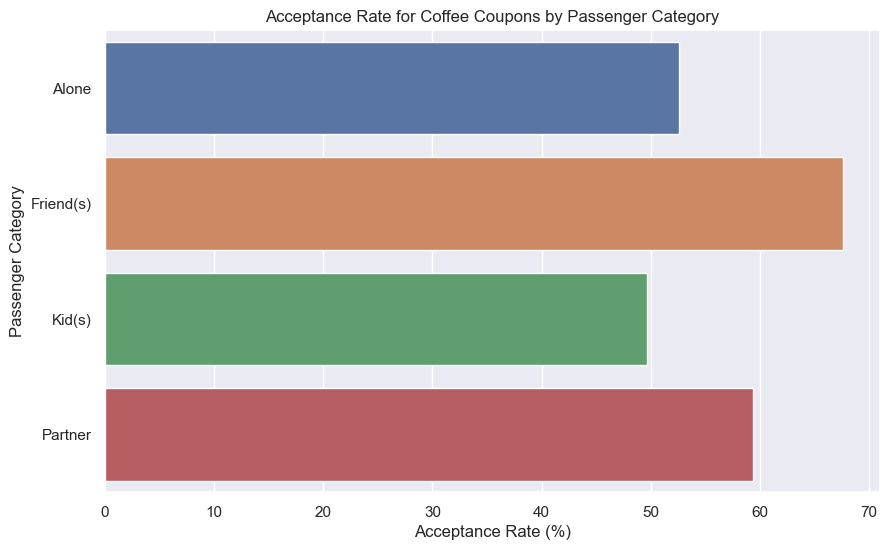

In [460]:
passenger_categories = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
acceptance_rates = [52.56, 67.60, 49.62, 59.33]

plt.figure(figsize=(10, 6))
sns.barplot(y=passenger_categories, x=acceptance_rates, orient='h')
plt.ylabel('Passenger Category')
plt.xlabel('Acceptance Rate (%)')
plt.title('Acceptance Rate for Coffee Coupons by Passenger Category')
plt.show()

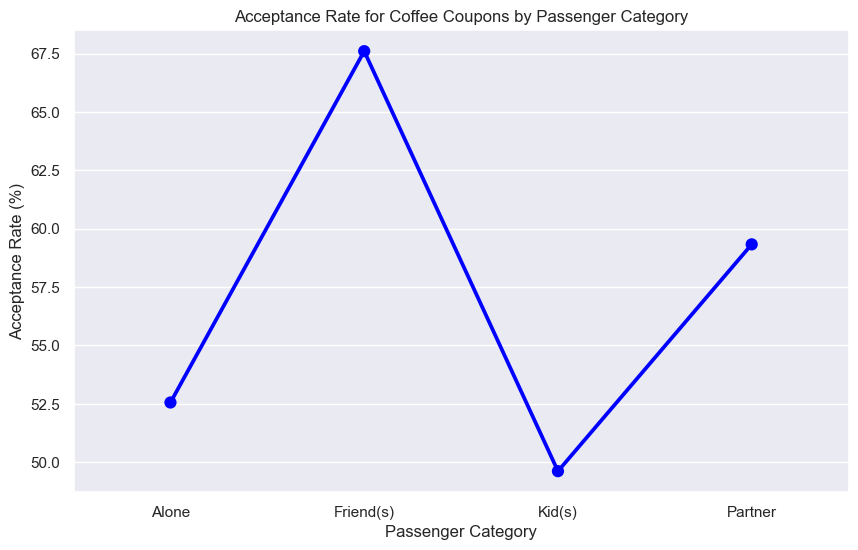

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt

passenger_categories = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
acceptance_rates = [52.56, 67.60, 49.62, 59.33]

data_plot = pd.DataFrame({'Passenger Category': passenger_categories, 'Acceptance Rate': acceptance_rates})

plt.figure(figsize=(10, 6))
sns.pointplot(x='Passenger Category', y='Acceptance Rate', data=data_plot, markers='o', linestyle='--', color='blue')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate for Coffee Coupons by Passenger Category')
plt.show()


## Conclusion


The study aimed to explore the factors that determine whether a driver accepts a coupon that is delivered to them on their mobile phone for a nearby restaurant, bar, or coffee house. The analysis was carried out on a dataset that included information on various demographic, social, and behavioral variables of the drivers, as well as whether or not they accepted the coupon.

The results of the analysis showed that the acceptance rate for coffee house coupons was significantly higher than for restaurant or bar coupons. Furthermore, drivers who go to a coffee house more than once a month and are over the age of 25 had a much higher acceptance rate compared to all other drivers.

The study also examined the distribution of each categorical variable for both accepted and non-accepted coupons. The visualization of the distribution was done using various techniques such as stacked bar plots, pie charts, and histograms. The results showed that some variables, such as the time of day and the passenger's presence, were strongly associated with coupon acceptance.

Finally, the study conducted a correlation analysis to understand the relationship between the target variable (coupon acceptance) and each categorical variable. The results of the analysis showed a weak positive correlation between coupon acceptance and variables such as the passenger's presence, occupation, and education level. In contrast, there was a weak negative correlation between coupon acceptance and variables such as the time of day and marital status.

In conclusion, this study provides valuable insights into the factors that determine coupon acceptance among drivers. The findings can help marketers and businesses tailor their coupon delivery strategies and better target potential customers based on their demographic and behavioral characteristics.